In [1]:
import $ivy.`org.apache.spark::spark-sql:3.1.1`
import $ivy.`org.apache.spark::spark-mllib:3.1.1`
import $ivy.`sh.almond::almond-spark:0.11.1`

import $ivy.$                                  

import $ivy.$                                    

import $ivy.$                               

In [2]:
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)

import org.apache.log4j.{Level, Logger}


In [3]:
import org.apache.spark.sql._

implicit class RichDF(val ds:DataFrame) {
    def showHTML(limit:Int = 20, truncate: Int = 20) = {
        import xml.Utility.escape
        val data = ds.take(limit)
        val header = ds.schema.fieldNames.toSeq        
        val rows: Seq[Seq[String]] = data.map { row =>
          row.toSeq.map { cell =>
            val str = cell match {
              case null => "null"
              case binary: Array[Byte] => binary.map("%02X".format(_)).mkString("[", " ", "]")
              case array: Array[_] => array.mkString("[", ", ", "]")
              case seq: Seq[_] => seq.mkString("[", ", ", "]")
              case _ => cell.toString
            }
            if (truncate > 0 && str.length > truncate) {
              // do not show ellipses for strings shorter than 4 characters.
              if (truncate < 4) str.substring(0, truncate)
              else str.substring(0, truncate - 3) + "..."
            } else {
              str
            }
          }: Seq[String]
        }

        publish.html(s""" <table>
                <tr>
                 ${header.map(h => s"<th>${escape(h)}</th>").mkString}
                </tr>
                ${rows.map { row =>
                  s"<tr>${row.map{c => s"<td>${escape(c)}</td>" }.mkString}</tr>"
                }.mkString}
            </table>
        """)        
    }
    
}

import org.apache.spark.sql._


defined class RichDF

# Запускаем Spark

In [4]:
val spark = {
  NotebookSparkSession.builder()
    .master("local[*]")
    .getOrCreate()
}

Loading spark-stubs
Getting spark JARs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@6fb9a191

In [5]:
val dataDir = "./data/train"

dataDir: String = "./data/train"

In [6]:
val dfRaw = spark.read.load(dataDir)

load at cmd5.sc:1

48 / 48

load at cmd5.sc:1

1 / 1

dfRaw: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]

In [7]:
dfRaw.showHTML(5)

take at cmd2.sc:6

1 / 1

instanceId_userId,instanceId_objectType,instanceId_objectId,audit_pos,audit_clientType,audit_timestamp,audit_timePassed,audit_experiment,audit_resourceType,metadata_ownerId,metadata_ownerType,metadata_createdAt,metadata_authorId,metadata_applicationId,metadata_numCompanions,metadata_numPhotos,metadata_numPolls,metadata_numSymbols,metadata_numTokens,metadata_numVideos,metadata_platform,metadata_totalVideoLength,metadata_options,relationsMask,userOwnerCounters_USER_FEED_REMOVE,userOwnerCounters_USER_PROFILE_VIEW,userOwnerCounters_VOTE_POLL,userOwnerCounters_USER_SEND_MESSAGE,userOwnerCounters_USER_DELETE_MESSAGE,userOwnerCounters_USER_INTERNAL_LIKE,userOwnerCounters_USER_INTERNAL_UNLIKE,userOwnerCounters_USER_STATUS_COMMENT_CREATE,userOwnerCounters_PHOTO_COMMENT_CREATE,userOwnerCounters_MOVIE_COMMENT_CREATE,userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,userOwnerCounters_COMMENT_INTERNAL_LIKE,userOwnerCounters_USER_FORUM_MESSAGE_CREATE,userOwnerCounters_PHOTO_MARK_CREATE,userOwnerCounters_PHOTO_VIEW,userOwnerCounters_PHOTO_PIN_BATCH_CREATE,userOwnerCounters_PHOTO_PIN_UPDATE,userOwnerCounters_USER_PRESENT_SEND,userOwnerCounters_UNKNOWN,userOwnerCounters_CREATE_TOPIC,userOwnerCounters_CREATE_IMAGE,userOwnerCounters_CREATE_MOVIE,userOwnerCounters_CREATE_COMMENT,userOwnerCounters_CREATE_LIKE,userOwnerCounters_TEXT,userOwnerCounters_IMAGE,userOwnerCounters_VIDEO,ownerUserCounters_USER_FEED_REMOVE,ownerUserCounters_USER_PROFILE_VIEW,ownerUserCounters_VOTE_POLL,ownerUserCounters_USER_SEND_MESSAGE,ownerUserCounters_USER_DELETE_MESSAGE,ownerUserCounters_USER_INTERNAL_LIKE,ownerUserCounters_USER_INTERNAL_UNLIKE,ownerUserCounters_USER_STATUS_COMMENT_CREATE,ownerUserCounters_PHOTO_COMMENT_CREATE,ownerUserCounters_MOVIE_COMMENT_CREATE,ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,ownerUserCounters_COMMENT_INTERNAL_LIKE,ownerUserCounters_USER_FORUM_MESSAGE_CREATE,ownerUserCounters_PHOTO_MARK_CREATE,ownerUserCounters_PHOTO_VIEW,ownerUserCounters_PHOTO_PIN_BATCH_CREATE,ownerUserCounters_PHOTO_PIN_UPDATE,ownerUserCounters_USER_PRESENT_SEND,ownerUserCounters_UNKNOWN,ownerUserCounters_CREATE_TOPIC,ownerUserCounters_CREATE_IMAGE,ownerUserCounters_CREATE_MOVIE,ownerUserCounters_CREATE_COMMENT,ownerUserCounters_CREATE_LIKE,ownerUserCounters_TEXT,ownerUserCounters_IMAGE,ownerUserCounters_VIDEO,membership_status,membership_statusUpdateDate,membership_joinDate,membership_joinRequestDate,owner_create_date,owner_birth_date,owner_gender,owner_status,owner_ID_country,owner_ID_Location,owner_is_active,owner_is_deleted,owner_is_abused,owner_is_activated,owner_change_datime,owner_is_semiactivated,owner_region,user_create_date,user_birth_date,user_gender,user_status,user_ID_country,user_ID_Location,user_is_active,user_is_deleted,user_is_abused,user_is_activated,user_change_datime,user_is_semiactivated,user_region,feedback,objectId,auditweights_ageMs,auditweights_closed,auditweights_ctr_gender,auditweights_ctr_high,auditweights_ctr_negative,auditweights_dailyRecency,auditweights_feedOwner_RECOMMENDED_GROUP,auditweights_feedStats,auditweights_friendCommentFeeds,auditweights_friendCommenters,auditweights_friendLikes,auditweights_friendLikes_actors,auditweights_hasDetectedText,auditweights_hasText,auditweights_isPymk,auditweights_isRandom,auditweights_likersFeedStats_hyper,auditweights_likersSvd_prelaunch_hyper,auditweights_matrix,auditweights_notOriginalPhoto,auditweights_numDislikes,auditweights_numLikes,auditweights_numShows,auditweights_onlineVideo,auditweights_partAge,auditweights_partCtr,auditweights_partSvd,auditweights_processedVideo,auditweights_relationMasks,auditweights_source_LIVE_TOP,auditweights_source_MOVIE_TOP,auditweights_svd_prelaunch,auditweights_svd_spark,auditweights_userAge,auditweights_userOwner_CREATE_COMMENT,auditweights_userOwner_CREATE_IMAGE,auditweights_userOwner_CREATE_LIKE,auditweights_userOwner_IMAGE,auditweights_userOwner_MOVIE_COMMENT_CREATE,auditweights_userOwner_PHOTO_COMMENT_CREATE,auditweights_userOwner_PHOTO_MARK_CREATE,

In [8]:
dfRaw.printSchema

root
 |-- instanceId_userId: integer (nullable = true)
 |-- instanceId_objectType: string (nullable = true)
 |-- instanceId_objectId: integer (nullable = true)
 |-- audit_pos: long (nullable = true)
 |-- audit_clientType: string (nullable = true)
 |-- audit_timestamp: long (nullable = true)
 |-- audit_timePassed: long (nullable = true)
 |-- audit_experiment: string (nullable = true)
 |-- audit_resourceType: long (nullable = true)
 |-- metadata_ownerId: integer (nullable = true)
 |-- metadata_ownerType: string (nullable = true)
 |-- metadata_createdAt: long (nullable = true)
 |-- metadata_authorId: integer (nullable = true)
 |-- metadata_applicationId: long (nullable = true)
 |-- metadata_numCompanions: integer (nullable = true)
 |-- metadata_numPhotos: integer (nullable = true)
 |-- metadata_numPolls: integer (nullable = true)
 |-- metadata_numSymbols: integer (nullable = true)
 |-- metadata_numTokens: integer (nullable = true)
 |-- metadata_numVideos: integer (nullable = true)
 |-- me

 |-- auditweights_userOwner_USER_INTERNAL_LIKE: double (nullable = true)
 |-- auditweights_userOwner_USER_INTERNAL_UNLIKE: double (nullable = true)
 |-- auditweights_userOwner_USER_PRESENT_SEND: double (nullable = true)
 |-- auditweights_userOwner_USER_PROFILE_VIEW: double (nullable = true)
 |-- auditweights_userOwner_USER_SEND_MESSAGE: double (nullable = true)
 |-- auditweights_userOwner_USER_STATUS_COMMENT_CREATE: double (nullable = true)
 |-- auditweights_userOwner_VIDEO: double (nullable = true)
 |-- auditweights_userOwner_VOTE_POLL: double (nullable = true)
 |-- auditweights_x_ActorsRelations: long (nullable = true)
 |-- auditweights_likersSvd_spark_hyper: double (nullable = true)
 |-- auditweights_source_PROMO: double (nullable = true)
 |-- date: date (nullable = true)



In [9]:
/*
val dfRawSummary = dfRaw.summary()
dfRawSummary.write.save("dfRawSummary")
*/
val dfRawSummary = spark.read.load("dfRawSummary")

dfRawSummary.showHTML()

load at cmd8.sc:1

1 / 1

take at cmd2.sc:6

1 / 1

take at cmd2.sc:6

4 / 4

take at cmd2.sc:6

3 / 3

summary,instanceId_userId,instanceId_objectType,instanceId_objectId,audit_pos,audit_clientType,audit_timestamp,audit_timePassed,audit_experiment,audit_resourceType,metadata_ownerId,metadata_ownerType,metadata_createdAt,metadata_authorId,metadata_applicationId,metadata_numCompanions,metadata_numPhotos,metadata_numPolls,metadata_numSymbols,metadata_numTokens,metadata_numVideos,metadata_platform,metadata_totalVideoLength,relationsMask,userOwnerCounters_USER_FEED_REMOVE,userOwnerCounters_USER_PROFILE_VIEW,userOwnerCounters_VOTE_POLL,userOwnerCounters_USER_SEND_MESSAGE,userOwnerCounters_USER_DELETE_MESSAGE,userOwnerCounters_USER_INTERNAL_LIKE,userOwnerCounters_USER_INTERNAL_UNLIKE,userOwnerCounters_USER_STATUS_COMMENT_CREATE,userOwnerCounters_PHOTO_COMMENT_CREATE,userOwnerCounters_MOVIE_COMMENT_CREATE,userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,userOwnerCounters_COMMENT_INTERNAL_LIKE,userOwnerCounters_USER_FORUM_MESSAGE_CREATE,userOwnerCounters_PHOTO_MARK_CREATE,userOwnerCounters_PHOTO_VIEW,userOwnerCounters_PHOTO_PIN_BATCH_CREATE,userOwnerCounters_PHOTO_PIN_UPDATE,userOwnerCounters_USER_PRESENT_SEND,userOwnerCounters_UNKNOWN,userOwnerCounters_CREATE_TOPIC,userOwnerCounters_CREATE_IMAGE,userOwnerCounters_CREATE_MOVIE,userOwnerCounters_CREATE_COMMENT,userOwnerCounters_CREATE_LIKE,userOwnerCounters_TEXT,userOwnerCounters_IMAGE,userOwnerCounters_VIDEO,ownerUserCounters_USER_FEED_REMOVE,ownerUserCounters_USER_PROFILE_VIEW,ownerUserCounters_VOTE_POLL,ownerUserCounters_USER_SEND_MESSAGE,ownerUserCounters_USER_DELETE_MESSAGE,ownerUserCounters_USER_INTERNAL_LIKE,ownerUserCounters_USER_INTERNAL_UNLIKE,ownerUserCounters_USER_STATUS_COMMENT_CREATE,ownerUserCounters_PHOTO_COMMENT_CREATE,ownerUserCounters_MOVIE_COMMENT_CREATE,ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,ownerUserCounters_COMMENT_INTERNAL_LIKE,ownerUserCounters_USER_FORUM_MESSAGE_CREATE,ownerUserCounters_PHOTO_MARK_CREATE,ownerUserCounters_PHOTO_VIEW,ownerUserCounters_PHOTO_PIN_BATCH_CREATE,ownerUserCounters_PHOTO_PIN_UPDATE,ownerUserCounters_USER_PRESENT_SEND,ownerUserCounters_UNKNOWN,ownerUserCounters_CREATE_TOPIC,ownerUserCounters_CREATE_IMAGE,ownerUserCounters_CREATE_MOVIE,ownerUserCounters_CREATE_COMMENT,ownerUserCounters_CREATE_LIKE,ownerUserCounters_TEXT,ownerUserCounters_IMAGE,ownerUserCounters_VIDEO,membership_status,membership_statusUpdateDate,membership_joinDate,membership_joinRequestDate,owner_create_date,owner_birth_date,owner_gender,owner_status,owner_ID_country,owner_ID_Location,owner_is_active,owner_is_deleted,owner_is_abused,owner_is_activated,owner_change_datime,owner_is_semiactivated,owner_region,user_create_date,user_birth_date,user_gender,user_status,user_ID_country,user_ID_Location,user_is_active,user_is_deleted,user_is_abused,user_is_activated,user_change_datime,user_is_semiactivated,user_region,objectId,auditweights_ageMs,auditweights_closed,auditweights_ctr_gender,auditweights_ctr_high,auditweights_ctr_negative,auditweights_dailyRecency,auditweights_feedOwner_RECOMMENDED_GROUP,auditweights_feedStats,auditweights_friendCommentFeeds,auditweights_friendCommenters,auditweights_friendLikes,auditweights_friendLikes_actors,auditweights_hasDetectedText,auditweights_hasText,auditweights_isPymk,auditweights_isRandom,auditweights_likersFeedStats_hyper,auditweights_likersSvd_prelaunch_hyper,auditweights_matrix,auditweights_notOriginalPhoto,auditweights_numDislikes,auditweights_numLikes,auditweights_numShows,auditweights_onlineVideo,auditweights_partAge,auditweights_partCtr,auditweights_partSvd,auditweights_processedVideo,auditweights_relationMasks,auditweights_source_LIVE_TOP,auditweights_source_MOVIE_TOP,auditweights_svd_prelaunch,auditweights_svd_spark,auditweights_userAge,auditweights_userOwner_CREATE_COMMENT,auditweights_userOwner_CREATE_IMAGE,auditweights_userOwner_CREATE_LIKE,auditweights_userOwner_IMAGE,auditweights_userOwner_MOVIE_COMMENT_CREATE,auditweights_userOwner_PHOTO_COMMENT_CREATE,auditweights_userOwner_PHOTO_MARK_CREATE,auditweights_userO

dfRawSummary: DataFrame = [summary: string, instanceId_userId: string ... 165 more fields]

---
# Задача: Постройте топ популярных групп на портале
*Не понятно, что имеется ввиду под популярностью, но предположим что это активность следующего пункта*

ownerId -- группа в которой опубликован пост ([источник](https://habr.com/ru/post/447376/)) 

In [10]:
import org.apache.spark.sql.functions.{col,sum,explode,hour}

import org.apache.spark.sql.functions.{col,sum,explode,hour}

### Посмотрим какие есть типы групп

In [11]:
//Есть ли пропущенные?
dfRaw.filter(dfRaw("metadata_ownerType").isNull || dfRaw("metadata_ownerType") === "" || dfRaw("metadata_ownerType").isNaN).count()

count at cmd10.sc:1

28 / 28

count at cmd10.sc:1

1 / 1

res10: Long = 0L

In [12]:
dfRaw
    .select("metadata_ownerType")
    .distinct()
    .showHTML()

take at cmd2.sc:6

28 / 28

take at cmd2.sc:6

1 / 1

take at cmd2.sc:6

4 / 4

take at cmd2.sc:6

20 / 20

take at cmd2.sc:6

100 / 100

take at cmd2.sc:6

75 / 75

metadata_ownerType
GROUP_OPEN_OFFICIAL
GROUP_OPEN


### Посмотрим какие есть типы фитбека

In [13]:
//Посмотрим на типы фитбеков
dfRaw
.select(explode(col("feedback")).as("feedbackType"))
.distinct()
.showHTML()

take at cmd2.sc:6

28 / 28

take at cmd2.sc:6

1 / 1

take at cmd2.sc:6

4 / 4

take at cmd2.sc:6

20 / 20

take at cmd2.sc:6

100 / 100

take at cmd2.sc:6

75 / 75

feedbackType
Commented
Viewed
ReShared
Clicked
Complaint
Ignored
Disliked
Liked
Unliked


### Построем топ груп по количеству постов

In [14]:
dfRaw.groupBy("metadata_ownerId")
    .count()
    .sort(col("count").desc)
    .showHTML()

take at cmd2.sc:6

28 / 28

take at cmd2.sc:6

200 / 200

metadata_ownerId,count
37463,71558
76851,53090
11222,49656
65305,46334
8225,44342
38703,44308
18942,42829
62833,40545
79619,40540
19481,40370


---
# Задача: Построите гистограммы популярности/активности групп на портале по времени суток

Чтобы гистаграмма была не сильно большой будем делать её по часам

In [15]:
val dfHours = dfRaw
    .withColumn(
        "hour",
        hour((col("audit_timestamp")/1000).cast("timestamp"))
    )
dfHours.showHTML(5)

take at cmd2.sc:6

1 / 1

instanceId_userId,instanceId_objectType,instanceId_objectId,audit_pos,audit_clientType,audit_timestamp,audit_timePassed,audit_experiment,audit_resourceType,metadata_ownerId,metadata_ownerType,metadata_createdAt,metadata_authorId,metadata_applicationId,metadata_numCompanions,metadata_numPhotos,metadata_numPolls,metadata_numSymbols,metadata_numTokens,metadata_numVideos,metadata_platform,metadata_totalVideoLength,metadata_options,relationsMask,userOwnerCounters_USER_FEED_REMOVE,userOwnerCounters_USER_PROFILE_VIEW,userOwnerCounters_VOTE_POLL,userOwnerCounters_USER_SEND_MESSAGE,userOwnerCounters_USER_DELETE_MESSAGE,userOwnerCounters_USER_INTERNAL_LIKE,userOwnerCounters_USER_INTERNAL_UNLIKE,userOwnerCounters_USER_STATUS_COMMENT_CREATE,userOwnerCounters_PHOTO_COMMENT_CREATE,userOwnerCounters_MOVIE_COMMENT_CREATE,userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,userOwnerCounters_COMMENT_INTERNAL_LIKE,userOwnerCounters_USER_FORUM_MESSAGE_CREATE,userOwnerCounters_PHOTO_MARK_CREATE,userOwnerCounters_PHOTO_VIEW,userOwnerCounters_PHOTO_PIN_BATCH_CREATE,userOwnerCounters_PHOTO_PIN_UPDATE,userOwnerCounters_USER_PRESENT_SEND,userOwnerCounters_UNKNOWN,userOwnerCounters_CREATE_TOPIC,userOwnerCounters_CREATE_IMAGE,userOwnerCounters_CREATE_MOVIE,userOwnerCounters_CREATE_COMMENT,userOwnerCounters_CREATE_LIKE,userOwnerCounters_TEXT,userOwnerCounters_IMAGE,userOwnerCounters_VIDEO,ownerUserCounters_USER_FEED_REMOVE,ownerUserCounters_USER_PROFILE_VIEW,ownerUserCounters_VOTE_POLL,ownerUserCounters_USER_SEND_MESSAGE,ownerUserCounters_USER_DELETE_MESSAGE,ownerUserCounters_USER_INTERNAL_LIKE,ownerUserCounters_USER_INTERNAL_UNLIKE,ownerUserCounters_USER_STATUS_COMMENT_CREATE,ownerUserCounters_PHOTO_COMMENT_CREATE,ownerUserCounters_MOVIE_COMMENT_CREATE,ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,ownerUserCounters_COMMENT_INTERNAL_LIKE,ownerUserCounters_USER_FORUM_MESSAGE_CREATE,ownerUserCounters_PHOTO_MARK_CREATE,ownerUserCounters_PHOTO_VIEW,ownerUserCounters_PHOTO_PIN_BATCH_CREATE,ownerUserCounters_PHOTO_PIN_UPDATE,ownerUserCounters_USER_PRESENT_SEND,ownerUserCounters_UNKNOWN,ownerUserCounters_CREATE_TOPIC,ownerUserCounters_CREATE_IMAGE,ownerUserCounters_CREATE_MOVIE,ownerUserCounters_CREATE_COMMENT,ownerUserCounters_CREATE_LIKE,ownerUserCounters_TEXT,ownerUserCounters_IMAGE,ownerUserCounters_VIDEO,membership_status,membership_statusUpdateDate,membership_joinDate,membership_joinRequestDate,owner_create_date,owner_birth_date,owner_gender,owner_status,owner_ID_country,owner_ID_Location,owner_is_active,owner_is_deleted,owner_is_abused,owner_is_activated,owner_change_datime,owner_is_semiactivated,owner_region,user_create_date,user_birth_date,user_gender,user_status,user_ID_country,user_ID_Location,user_is_active,user_is_deleted,user_is_abused,user_is_activated,user_change_datime,user_is_semiactivated,user_region,feedback,objectId,auditweights_ageMs,auditweights_closed,auditweights_ctr_gender,auditweights_ctr_high,auditweights_ctr_negative,auditweights_dailyRecency,auditweights_feedOwner_RECOMMENDED_GROUP,auditweights_feedStats,auditweights_friendCommentFeeds,auditweights_friendCommenters,auditweights_friendLikes,auditweights_friendLikes_actors,auditweights_hasDetectedText,auditweights_hasText,auditweights_isPymk,auditweights_isRandom,auditweights_likersFeedStats_hyper,auditweights_likersSvd_prelaunch_hyper,auditweights_matrix,auditweights_notOriginalPhoto,auditweights_numDislikes,auditweights_numLikes,auditweights_numShows,auditweights_onlineVideo,auditweights_partAge,auditweights_partCtr,auditweights_partSvd,auditweights_processedVideo,auditweights_relationMasks,auditweights_source_LIVE_TOP,auditweights_source_MOVIE_TOP,auditweights_svd_prelaunch,auditweights_svd_spark,auditweights_userAge,auditweights_userOwner_CREATE_COMMENT,auditweights_userOwner_CREATE_IMAGE,auditweights_userOwner_CREATE_LIKE,auditweights_userOwner_IMAGE,auditweights_userOwner_MOVIE_COMMENT_CREATE,auditweights_userOwner_PHOTO_COMMENT_CREATE,auditweights_userOwner_PHOTO_MARK_CREATE,

dfHours: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 168 more fields]

### Сначала посмотрим распределение постов для всех групп по часам

In [16]:
import $ivy.`io.github.cibotech::evilplot-repl:0.8.1`

Downloaded https://repo1.maven.org/maven2/io/github/cibotech/evilplot-repl_2.12/0.8.1/evilplot-repl_2.12-0.8.1.pom
Downloaded https://repo1.maven.org/maven2/io/github/cibotech/evilplot_2.12/0.8.1/evilplot_2.12-0.8.1.pom
Downloaded https://repo1.maven.org/maven2/org/scalactic/scalactic_2.12/3.0.8/scalactic_2.12-3.0.8.pom
Downloaded https://repo1.maven.org/maven2/io/circe/circe-generic-extras_2.12/0.13.0/circe-generic-extras_2.12-0.13.0.pom
Downloaded https://repo1.maven.org/maven2/io/circe/circe-core_2.12/0.13.0/circe-core_2.12-0.13.0.pom
Downloaded https://repo1.maven.org/maven2/io/circe/circe-generic_2.12/0.13.0/circe-generic_2.12-0.13.0.pom
Downloaded https://repo1.maven.org/maven2/io/circe/circe-parser_2.12/0.13.0/circe-parser_2.12-0.13.0.pom
Downloaded https://repo1.maven.org/maven2/io/github/cibotech/evilplot-math_2.12/0.8.1/evilplot-math_2.12-0.8.1.pom
Downloaded https://repo1.maven.org/maven2/io/circe/circe-jawn_2.12/0.13.0/circe-jawn_2.12-0.13.0.pom
Downloaded https://repo1.mav

Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_ref-xbuilds/1.1/native_ref-xbuilds-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_system-xbuilds/1.1/native_system-xbuilds-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_ref/1.1/native_ref-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_system/1.1/native_system-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_system-java/1.1/native_system-java-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/native_ref-java/1.1/native_ref-java-1.1.pom
Downloaded https://repo1.maven.org/maven2/com/github/fommil/jniloader/1.1/jniloader-1.1.pom
Downloaded https://repo1.maven.org/maven2/io/github/cibotech/evilplot-repl_2.12/0.8.1/evilplot-repl_2.12-0.8.1-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-linux-x86_64/1.1/netl

Downloaded https://repo1.maven.org/maven2/io/github/cibotech/evilplot_2.12/0.8.1/evilplot_2.12-0.8.1-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/jniloader/1.1/jniloader-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-linux-i686/1.1/netlib-native_system-linux-i686-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/cats-kernel_2.12/2.1.0/cats-kernel_2.12-2.1.0.jar
Downloaded https://repo1.maven.org/maven2/io/circe/circe-generic-extras_2.12/0.13.0/circe-generic-extras_2.12-0.13.0-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-osx-x86_64/1.1/netlib-native_system-osx-x86_64-1.1-sources.jar
Downloaded https://repo1.maven.org/maven2/io/github/cibotech/evilplot-math_2.12/0.8.1/evilplot-math_2.12-0.8.1.jar
Downloaded https://repo1.maven.org/maven2/io/circe/circe-core_2.12/0.13.0/circe-core_2.12-0.13.0.jar
Downloaded https://repo1.maven.org

Downloaded https://repo1.maven.org/maven2/io/circe/circe-jawn_2.12/0.13.0/circe-jawn_2.12-0.13.0-sources.jar
Downloaded https://repo1.maven.org/maven2/org/slf4j/slf4j-api/1.7.5/slf4j-api-1.7.5-sources.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/all/1.1.2/all-1.1.2-sources.jar.sha1
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_system-osx-x86_64/1.1/netlib-native_system-osx-x86_64-1.1-natives.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_ref-osx-x86_64/1.1/netlib-native_ref-osx-x86_64-1.1-natives.jar
Downloaded https://repo1.maven.org/maven2/com/github/fommil/netlib/netlib-native_ref-win-x86_64/1.1/netlib-native_ref-win-x86_64-1.1-natives.jar
Downloaded https://repo1.maven.org/maven2/org/typelevel/cats-core_2.12/2.1.0/cats-core_2.12-2.1.0.jar


import $ivy.$                                        

In [17]:
def showPlot(plot: com.cibo.evilplot.geometry.Drawable) =
  Image.fromRenderedImage(plot.asBufferedImage, format=Image.PNG)

defined function showPlot

In [18]:
import com.cibo.evilplot.colors._
import com.cibo.evilplot.geometry.Extent
import com.cibo.evilplot.plot._
import com.cibo.evilplot.plot.aesthetics.DefaultTheme._
import com.cibo.evilplot.plot.renderers.BarRenderer

import com.cibo.evilplot.colors._

import com.cibo.evilplot.geometry.Extent

import com.cibo.evilplot.plot._

import com.cibo.evilplot.plot.aesthetics.DefaultTheme._

import com.cibo.evilplot.plot.renderers.BarRenderer

In [19]:
val (xLabelsHour, yAllCount) = dfHours
    .groupBy("hour")
    .count()
    .sort(col("hour"))
    .collect
    .map(r=>(r(0).toString, r(1).toString.toDouble))
    .toList
    .unzip

collect at cmd18.sc:4

28 / 28

collect at cmd18.sc:4

200 / 200

collect at cmd18.sc:4

200 / 200

collect at cmd18.sc:4

24 / 24

xLabelsHour: List[String] = List(
  "0",
  "1",
  "2",
  "3",
  "4",
  "5",
  "6",
  "7",
  "8",
  "9",
  "10",
  "11",
  "12",
  "13",
  "14",
  "15",
  "16",
  "17",
  "18",
  "19",
  "20",
  "21",
  "22",
  "23"
)
yAllCount: List[Double] = List(
  190669.0,
  255999.0,
  353397.0,
  508045.0,
  662820.0,
  787754.0,
  831354.0,
  837955.0,
  843048.0,
  858546.0,
  889471.0,
  922062.0,
  972513.0,
  1029619.0,
  1122013.0,
  1213270.0,
  1276641.0,
  1275757.0,
  1180341.0,
  917899.0,
  623270.0,
  347801.0,
  214532.0,
  171799.0
)

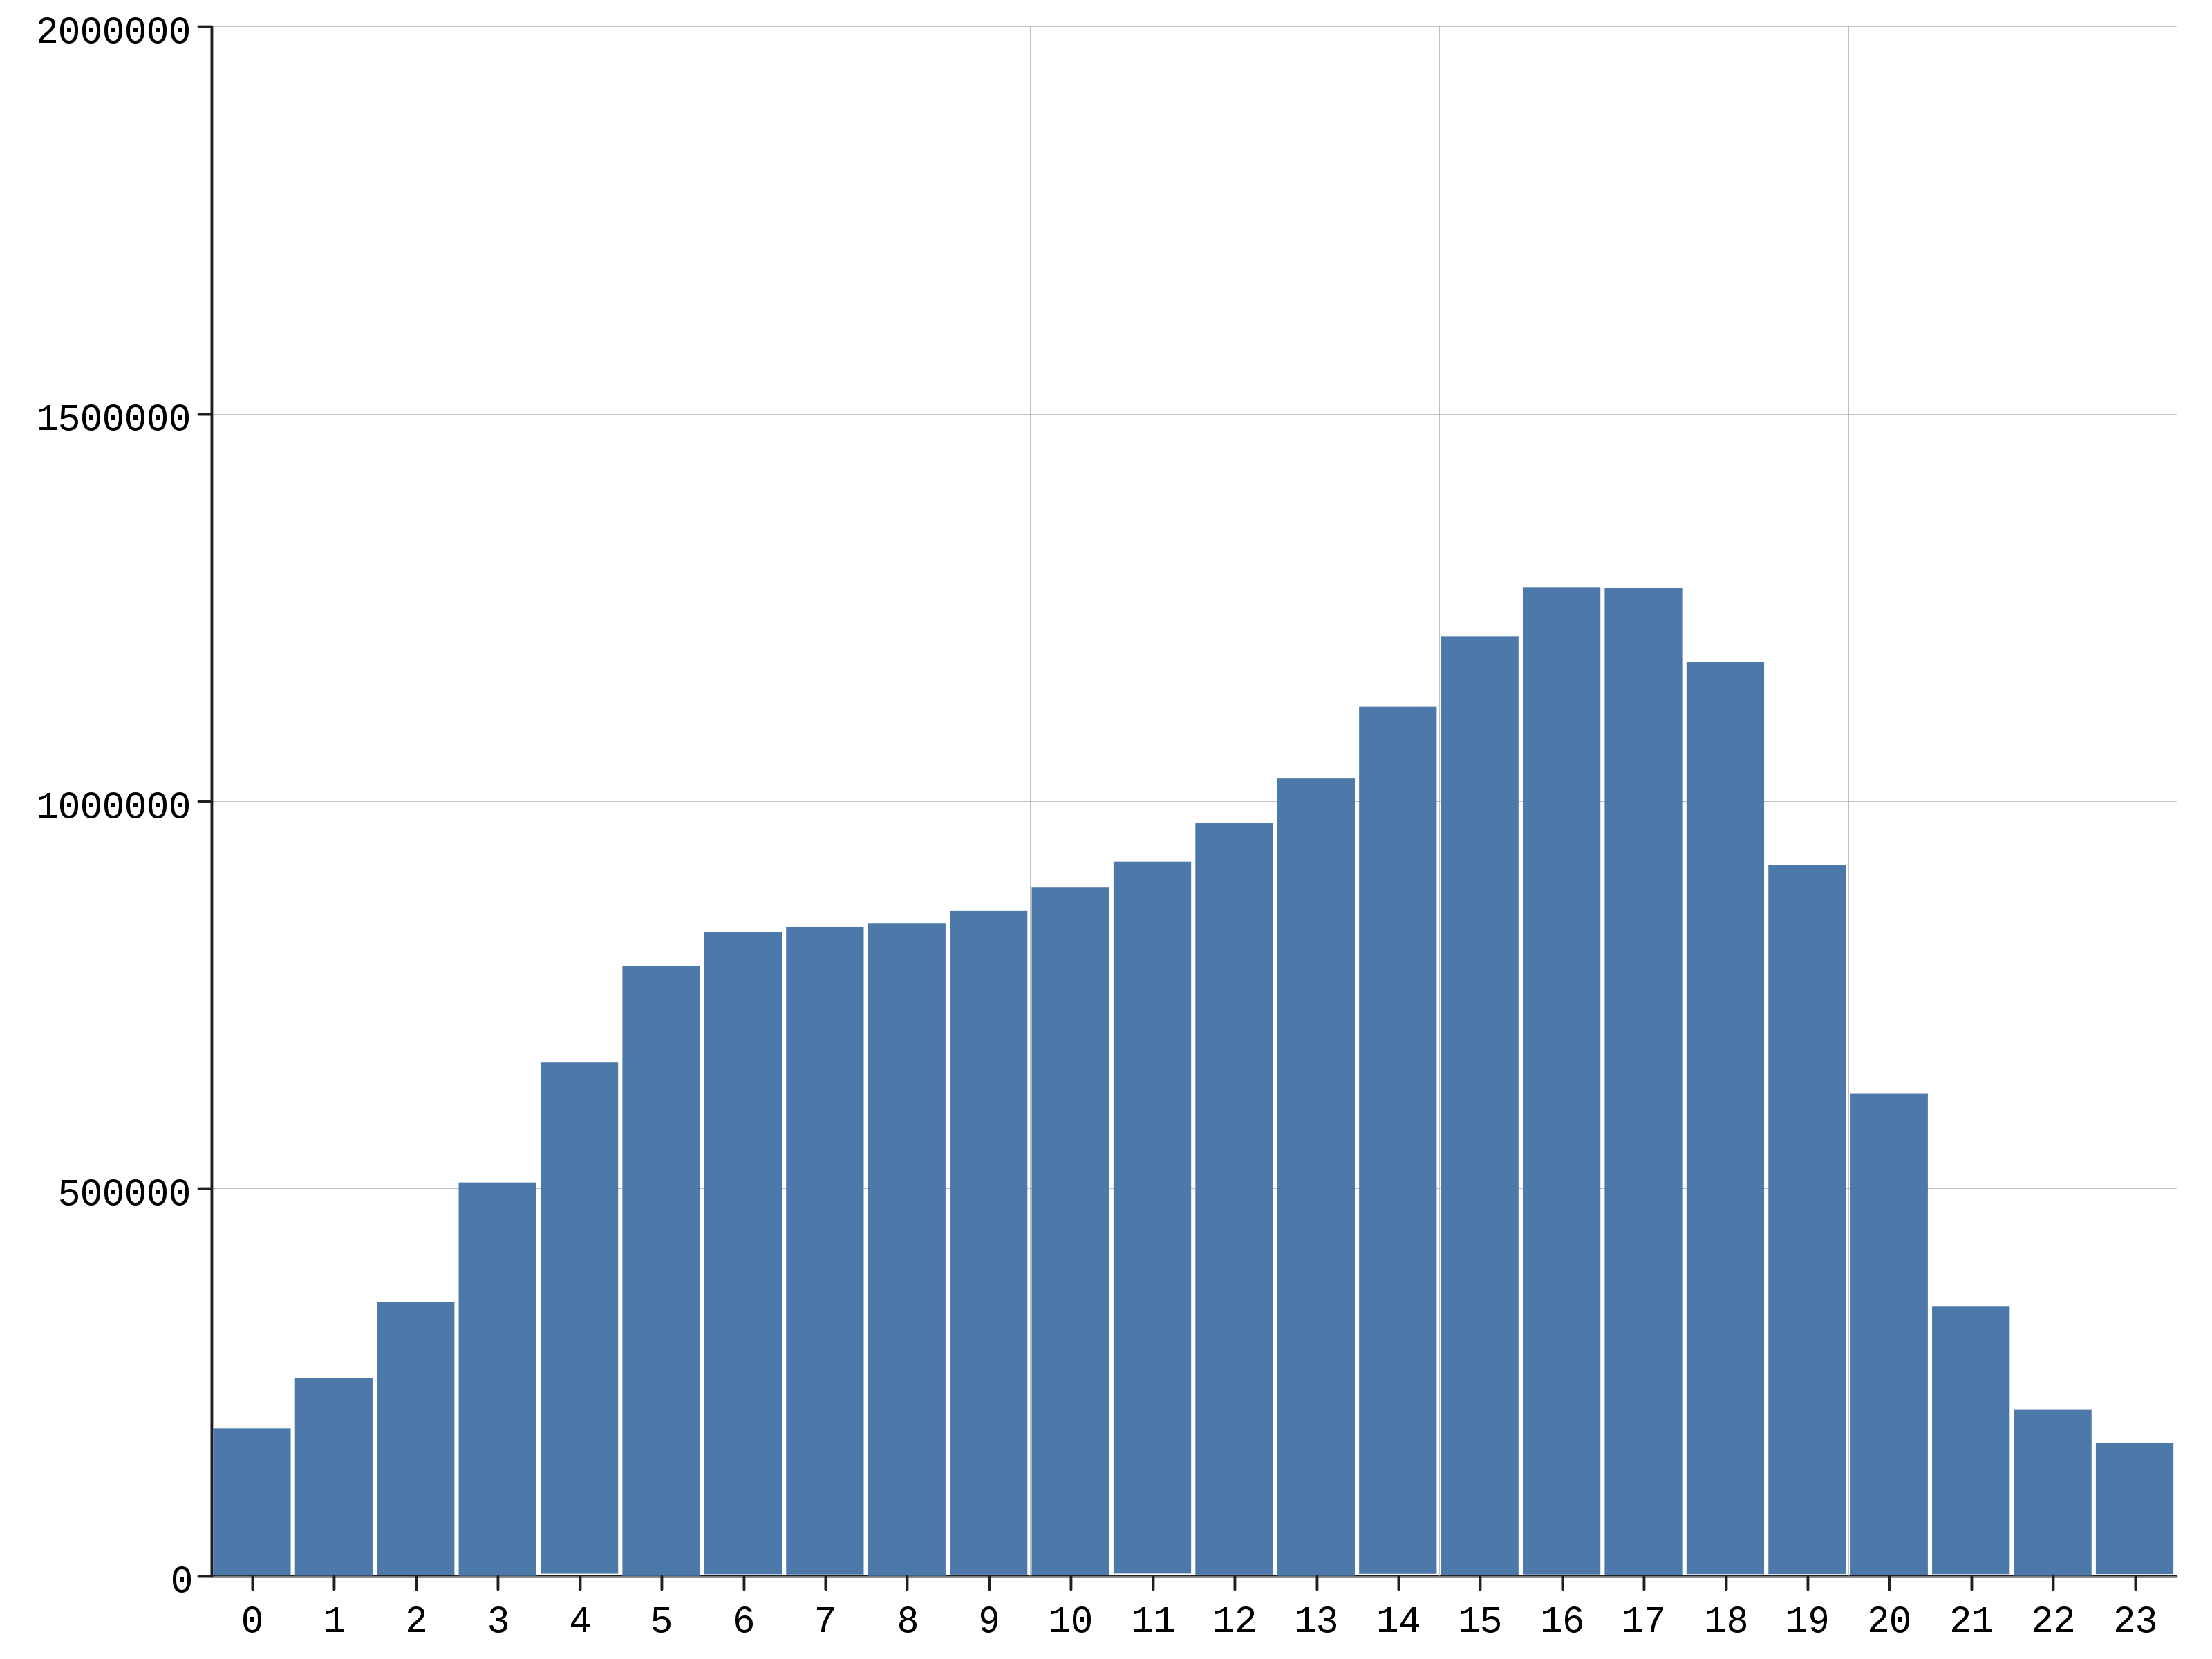

In [20]:
showPlot(
    BarChart(
        yAllCount.toSeq
    )
    .standard(xLabels = xLabelsHour)
    .render()
)

In [21]:
import org.apache.spark.sql.expressions.Aggregator
import org.apache.spark.sql.{Encoder, Encoders, Row}
import scala.collection.mutable.{ArrayBuffer}
import scala.collection.immutable.{Map}
import org.apache.spark.sql.catalyst.encoders.ExpressionEncoder

import org.apache.spark.sql.expressions.Aggregator

import org.apache.spark.sql.{Encoder, Encoders, Row}

import scala.collection.mutable.{ArrayBuffer}

import scala.collection.immutable.{Map}

import org.apache.spark.sql.catalyst.encoders.ExpressionEncoder

In [22]:
case class AgrigateByArray(
    colValues: String,
    colKeys: String,
    arr: Array[Int],
    zeroValue: Long = 0
    )extends Aggregator[
        Row,
        Map[Int, Long],
        Array[Long]
    ] with Serializable {

    def zero: Map[Int, Long] = arr.zip(Array.fill[Long](arr.length)(zeroValue)).toMap

    def reduce(b: Map[Int, Long], a: Row): Map[Int, Long] = {
        val key = a.getAs[Int](colKeys)
        if (arr.contains(key)){
            val value = a.getAs[Long](colValues)
            b+(key->(b(key)+value.toLong))
        }else{
            b
        }
    }

    def merge(b1: Map[Int, Long], b2: Map[Int, Long]): Map[Int, Long] = {
        b1++b2.map{
            case (k,v) =>{
                k -> (v + b1.getOrElse(k,zeroValue))
            }
        }
    }
    def finish(b: Map[Int, Long]): Array[Long] = {
        val temp = ArrayBuffer[Long]()
        for(i <- arr){
            temp += b(i)
        }
        temp.toArray
    }

    def bufferEncoder: Encoder[Map[Int, Long]] = ExpressionEncoder()
    def outputEncoder: Encoder[Array[Long]] = ExpressionEncoder()
}

defined class AgrigateByArray

In [23]:
val hoursArray = (0 to 23).toArray

val sumByHours = AgrigateByArray(
    colValues="count",
    colKeys="hour",
    arr=hoursArray
).toColumn.name("sumByHours")

hoursArray: Array[Int] = Array(
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23
)
sumByHours: TypedColumn[Row, Array[Long]] = agrigatebyarray(externalmaptocatalyst(lambdavariable(ExternalMapToCatalyst_key, IntegerType, false, 21), lambdavariable(ExternalMapToCatalyst_key, IntegerType, false, 21), lambdavariable(ExternalMapToCatalyst_value, LongType, false, 22), lambdavariable(ExternalMapToCatalyst_value, LongType, false, 22), input[0, scala.collection.immutable.Map, true]) AS `value`, catalysttoexternalmap(lambdavariable(CatalystToExternalMap_key, IntegerType, false, 23), lambdavariable(CatalystToExternalMap_key, IntegerType, false, 23), lambdavariable(CatalystToExternalMap_value, LongType, false, 24), lambdavariable(CatalystToExternalMap_value, LongType, false, 24), input[0, map<int,bigint>, true], interface scala.collection.immutable.Map), staticinvoke(class org.apache.spark.sql.catalyst.expressions.

In [24]:
import spark.implicits._

case class AggByHours(metadata_ownerId: Int, sumByHours: Array[Long], sum: Long)
val dsAggByHours: Dataset[AggByHours] = dfHours
    .groupBy("metadata_ownerId", "hour")
    .count()
    .groupBy("metadata_ownerId")
    .agg(
        sumByHours,
        sum("count").as("sum")
    ).sort(col("sum").desc)
    .as[AggByHours]

import spark.implicits._


defined class AggByHours
dsAggByHours: Dataset[AggByHours] = [metadata_ownerId: int, sumByHours: array<bigint> ... 1 more field]

In [25]:
val (xLabelsAggByHour, yAggByHour) = dsAggByHours
    .collect
    .map(r=>(r.metadata_ownerId.toString, r.sumByHours))
    .toList
    .unzip

collect at cmd24.sc:1

28 / 28

collect at cmd24.sc:1

200 / 200

collect at cmd24.sc:1

200 / 200

collect at cmd24.sc:1

200 / 200

collect at cmd24.sc:1

103 / 103

xLabelsAggByHour: List[String] = List(
  "37463",
  "76851",
  "11222",
  "65305",
  "8225",
  "38703",
  "18942",
  "62833",
  "79619",
  "19481",
  "11058",
  "77398",
  "14285",
  "67111",
  "9182",
  "51346",
  "64184",
  "12639",
  "20350",
  "60195",
  "34963",
  "11163",
  "9236",
  "17215",
  "32890",
  "14959",
  "66769",
  "32841",
  "71284",
  "23051",
  "83218",
  "82227",
  "26843",
  "32839",
  "26735",
  "23080",
  "30830",
  "2425",
...
yAggByHour: List[Array[Long]] = List(
  Array(
    787L,
    1080L,
    1533L,
    2241L,
    2933L,
    3311L,
    3622L,
    3455L,
    3283L,
    3383L,
    3572L,
    3651L,
    3643L,
    3872L,
    4224L,
    4652L,
    4903L,
    4783L,
    4214L,
    3347L,
    2297L,
    1232L,
    820L,
    720L
  ),
  Array(
    457L,
    652L,
    917L,
    1295L,
    1885L,
    2198L,
    2379L,
    2303L,
    2607L,
    2583L,
    2762L,
...

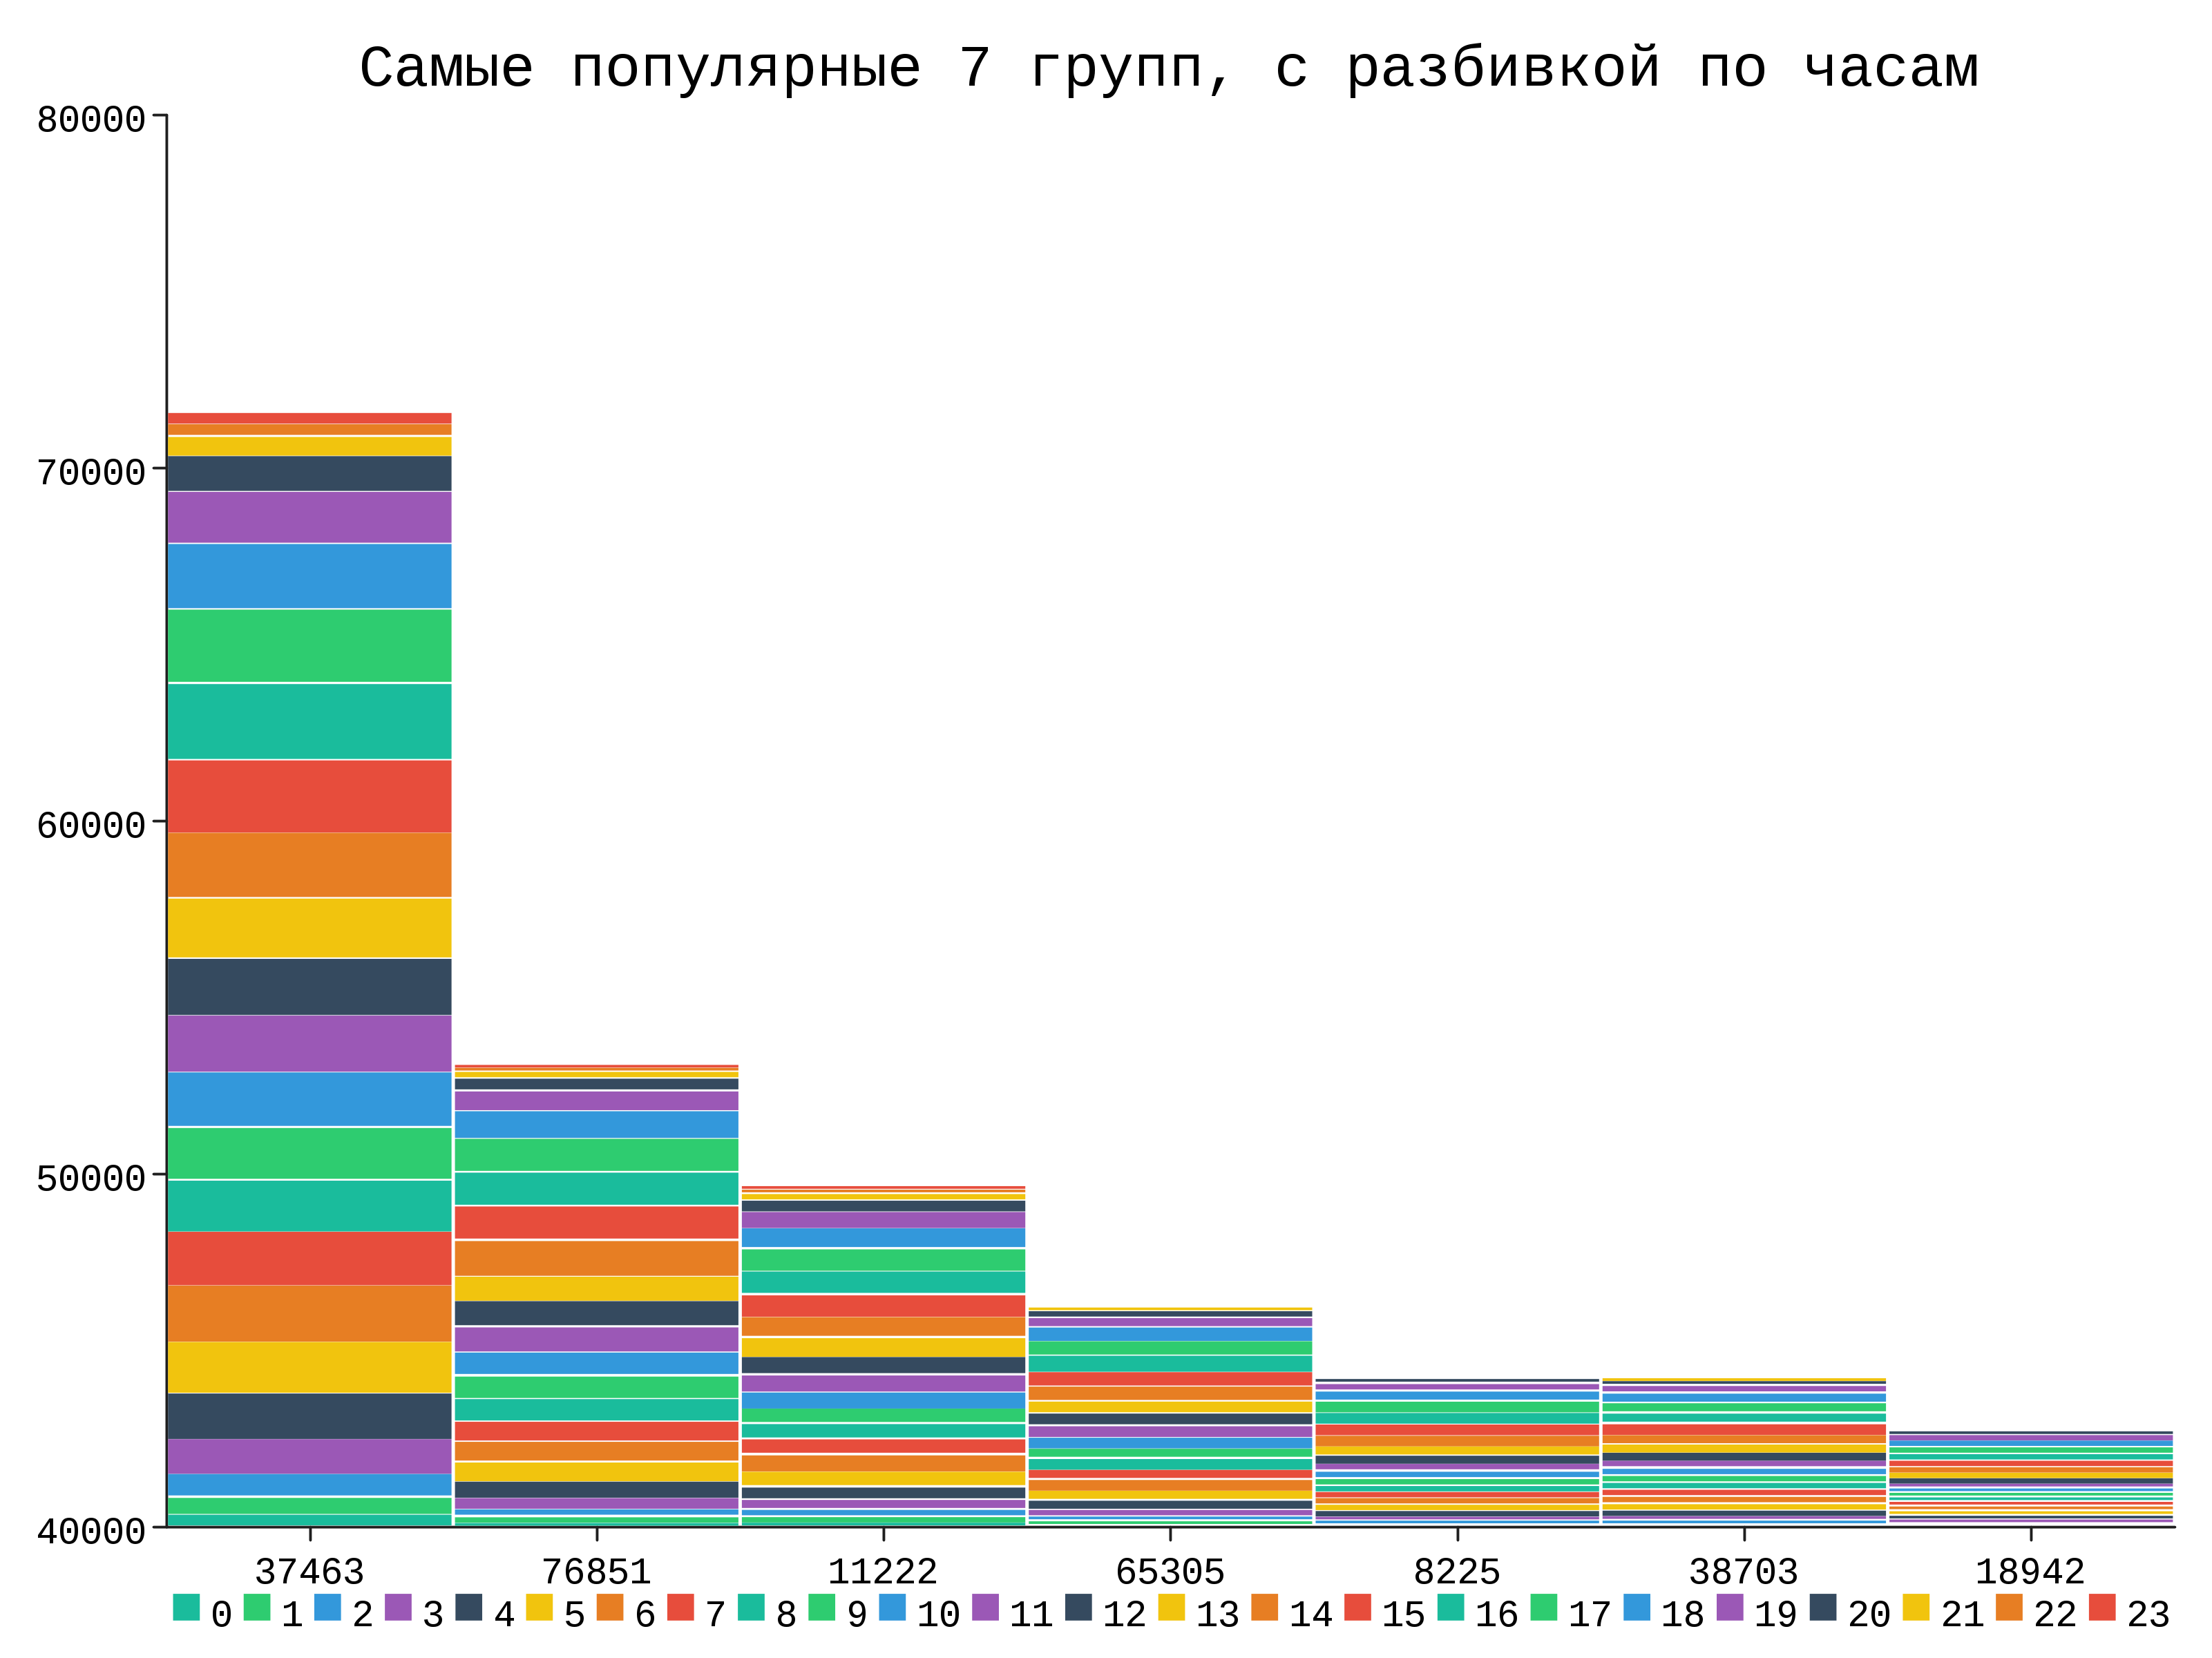

groupNum: Int = 7

In [26]:
val groupNum = 7

showPlot(
    BarChart
      .stacked(
        yAggByHour.map(_.map(_.toDouble).toSeq).toSeq.take(groupNum),
        labels = hoursArray.map(_.toString).toSeq,
        colors = Color.getDefaultPaletteSeq(hoursArray.length)
      )
      .title(s"Самые популярные $groupNum групп, с разбивкой по часам")
      .xAxis(xLabelsAggByHour.take(groupNum))
      .yAxis()
      .frame()
      .bottomLegend()
      .render()
)

---
# Задача: Посчитайте корреляцию признаков с целевой переменной

Необходимо посчитать кореляцию с наличием или отсутсвием Liked в колонке feedback. Тут подойдет коэффициент ранговой корреляции Спирмена

In [27]:
import org.apache.spark.sql.types.DoubleType
import org.apache.spark.sql.functions.{array_contains, when}
import org.apache.spark.ml.feature.{StringIndexer, VectorAssembler}
import org.apache.spark.ml.linalg.{Matrix}
import org.apache.spark.ml.stat.{Correlation}
import org.apache.spark.sql.{Row}

import org.apache.spark.sql.types.DoubleType

import org.apache.spark.sql.functions.{array_contains, when}

import org.apache.spark.ml.feature.{StringIndexer, VectorAssembler}

import org.apache.spark.ml.linalg.{Matrix}

import org.apache.spark.ml.stat.{Correlation}

import org.apache.spark.sql.{Row}

In [28]:
val inColl = "feedback"
val searchStr = "Liked"

val dfLiked = dfRaw.withColumn(searchStr, array_contains(col(inColl),searchStr)).drop(inColl)

inColl: String = "feedback"
searchStr: String = "Liked"
dfLiked: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]

In [29]:
val dfLikedDouble = dfLiked.withColumn(searchStr, dfLiked(searchStr).cast(DoubleType))

dfLikedDouble: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 167 more fields]

In [30]:
val Pattern = "(^Array.*)".r

val colsNumber  = ArrayBuffer[String]()
val colsString  = ArrayBuffer[String]()
val colsArray   = ArrayBuffer[String]()
val colsUnknown = ArrayBuffer[String]()

dfLikedDouble
    .dtypes
    .foreach(ct=>{
        val (c,t) = ct
        t match {
            case "IntegerType"| "LongType" | "DoubleType" => colsNumber+=c
            case "StringType"                             => colsString+=c
            case Pattern(_)                               => colsArray+=c
            case _                                        => colsUnknown+=c
        }
    })

Pattern: scala.util.matching.Regex = (^Array.*)
colsNumber: ArrayBuffer[String] = ArrayBuffer(
  "instanceId_userId",
  "instanceId_objectId",
  "audit_pos",
  "audit_timestamp",
  "audit_timePassed",
  "audit_resourceType",
  "metadata_ownerId",
  "metadata_createdAt",
  "metadata_authorId",
  "metadata_applicationId",
  "metadata_numCompanions",
  "metadata_numPhotos",
  "metadata_numPolls",
  "metadata_numSymbols",
  "metadata_numTokens",
  "metadata_numVideos",
  "metadata_totalVideoLength",
  "relationsMask",
  "userOwnerCounters_USER_FEED_REMOVE",
  "userOwnerCounters_USER_PROFILE_VIEW",
  "userOwnerCounters_VOTE_POLL",
  "userOwnerCounters_USER_SEND_MESSAGE",
  "userOwnerCounters_USER_DELETE_MESSAGE",
  "userOwnerCounters_USER_INTERNAL_LIKE",
  "userOwnerCounters_USER_INTERNAL_UNLIKE",
  "userOwnerCounters_USER_STATUS_COMMENT_CREATE",
  "userOwnerCounters_PHOTO_COMMENT_CREATE",
  "userOwnerCounters_MOVIE_COMMENT_CREATE",
  "userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE",
  "

In [31]:
val colArray = colsArray(0)
val arrayValue = dfLikedDouble
    .select(explode(col(colArray)))
    .distinct
    .collect
    .map(_.toSeq(0).toString)

collect at cmd30.sc:3

28 / 28

collect at cmd30.sc:3

200 / 200

colArray: String = "metadata_options"
arrayValue: Array[String] = Array(
  "IS_GIF",
  "IS_DISGUSTING",
  "IS_PART_OF_TOPIC",
  "HAS_PINS",
  "HAS_PHOTOS",
  "HAS_TEXT",
  "HAS_CHEATED_TEXT",
  "HAS_POLLS",
  "IS_PART_OF_ALBUM",
  "HAS_DETECTED_TEXT",
  "IS_CENSORED",
  "HAS_VIDEOS",
  "IS_PROMO",
  "HAS_URLS",
  "HAS_COMPANIONS",
  "HAS_MUSIC",
  "IS_EXTERNAL_SHARE",
  "IS_INTERNAL_GROUP_SHARE",
  "IS_INTERNAL_SHARE"
)

In [32]:
def arrayToCol(df:DataFrame, column:String, arrVal:Array[String]) = {
    var dfRes = df
    for (c<-arrVal){
        dfRes = dfRes.withColumn(column+"_"+c,
            array_contains(col(column),c).cast(DoubleType))
    }
    dfRes.drop(column)
}

defined function arrayToCol

In [33]:
val dfLikedDoubleNoArray = arrayToCol(df=dfLikedDouble, column=colArray, arrVal=arrayValue)

dfLikedDoubleNoArray: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 185 more fields]

In [34]:
def colsToIndex(df:DataFrame, colsName:Array[String]) = {
    val colsNameIndex = colsName.map(c=>{c+"_index"})
    
    val indexer = new StringIndexer()
      .setInputCols(colsName)
      .setOutputCols(colsNameIndex)
    
    val indexed = indexer
        .setHandleInvalid("keep")
        .fit(df)
        .transform(df)
    
    indexed.drop(colsName: _*)
}

defined function colsToIndex

In [35]:
val dfStringIndexer = colsToIndex(dfLikedDoubleNoArray, colsString.toArray).drop(colsUnknown: _*)

collect at StringIndexer.scala:204

28 / 28

collect at StringIndexer.scala:204

1 / 1

dfStringIndexer: DataFrame = [instanceId_userId: int, instanceId_objectId: int ... 184 more fields]

In [36]:
val exprs = dfStringIndexer
    .columns
    .map(
        c => col(c)
            .cast("double")
    )
val dfDouble = dfStringIndexer.select(exprs: _*)

exprs: Array[Column] = Array(
  CAST(instanceId_userId AS DOUBLE),
  CAST(instanceId_objectId AS DOUBLE),
  CAST(audit_pos AS DOUBLE),
  CAST(audit_timestamp AS DOUBLE),
  CAST(audit_timePassed AS DOUBLE),
  CAST(audit_resourceType AS DOUBLE),
  CAST(metadata_ownerId AS DOUBLE),
  CAST(metadata_createdAt AS DOUBLE),
  CAST(metadata_authorId AS DOUBLE),
  CAST(metadata_applicationId AS DOUBLE),
  CAST(metadata_numCompanions AS DOUBLE),
  CAST(metadata_numPhotos AS DOUBLE),
  CAST(metadata_numPolls AS DOUBLE),
  CAST(metadata_numSymbols AS DOUBLE),
  CAST(metadata_numTokens AS DOUBLE),
  CAST(metadata_numVideos AS DOUBLE),
  CAST(metadata_totalVideoLength AS DOUBLE),
  CAST(relationsMask AS DOUBLE),
  CAST(userOwnerCounters_USER_FEED_REMOVE AS DOUBLE),
  CAST(userOwnerCounters_USER_PROFILE_VIEW AS DOUBLE),
  CAST(userOwnerCounters_VOTE_POLL AS DOUBLE),
  CAST(userOwnerCounters_USER_SEND_MESSAGE AS DOUBLE),
  CAST(userOwnerCounters_USER_DELETE_MESSAGE AS DOUBLE),
  CAST(userOwnerCounters_

In [37]:
def getColumnsCorr(df:DataFrame, columns:Array[String]):Array[Double]={
    val assembler = new VectorAssembler()
        .setInputCols(columns)
        .setOutputCol("features")
    
    val output = assembler
        .transform(df)
    
    val Row(coeff: Matrix) = Correlation.corr(
                dataset=output,
                column="features",
                method="spearman"
            ).head
    
    coeff.toArray.slice(1, coeff.numRows)
}

defined function getColumnsCorr

In [37]:
// тут мы пропустим так как долго считается и я сохранил в фаил


/*

val arr:ArrayBuffer[(String, Array[Double])]=ArrayBuffer()
// реализуем c поколоночным удалением null, чтобы увеличить качество поиска корреляции
// запустим без оптимизации, 

for (c<-dfDouble.columns){
    println("Start for column "+c)
    val df = dfDouble.select(searchStr, c).na.drop()
    if (df.count>1){
        arr.append((c, getColumnsCorr(df, Array(searchStr, c))))
    }else{
        arr.append((c, Array[Double]()))
    }
}

val dfArr = arr.toDF("column_name", "correlations")
                .select(col("column_name"), explode(col("correlations")))
dfArr.write.format("csv").save("liked_correlations")

*/

In [38]:
import org.apache.spark.sql.types._

val customSchema = StructType(Array(
    StructField("column_name",StringType,true),
    StructField("col",DoubleType,true)
  ))

val dfArr = spark.read
    .format("csv")
    .schema(customSchema)
    .load("liked_correlations")

import org.apache.spark.sql.types._


customSchema: StructType = StructType(
  StructField("column_name", StringType, true, {}),
  StructField("col", DoubleType, true, {})
)
dfArr: DataFrame = [column_name: string, col: double]

In [39]:
// посмотрим где есть корреляция Спирмена больше 0.4

dfArr.filter(!col("col").isNaN && col("col") > 0.3).sort(col("col").desc).show(dfArr.count.toInt, false)

count at cmd38.sc:1

16 / 16

count at cmd38.sc:1

1 / 1

show at cmd38.sc:1

16 / 16

+----------------------------------------+-------------------+
|column_name                             |col                |
+----------------------------------------+-------------------+
|Liked                                   |1.000000000000001  |
|metadata_applicationId                  |0.4847094820913141 |
|user_is_activated                       |0.48470206074518485|
|metadata_options_IS_PROMO               |0.48469151908507674|
|user_is_abused                          |0.48466930344224896|
|user_is_deleted                         |0.4846691615314339 |
|user_is_active                          |0.48456357734450944|
|metadata_options_HAS_CHEATED_TEXT       |0.4843772141501115 |
|metadata_options_IS_CENSORED            |0.48422887483666766|
|metadata_options_IS_DISGUSTING          |0.48384091596871376|
|metadata_options_HAS_PINS               |0.48362503362975706|
|metadata_numCompanions                  |0.48326969263784825|
|metadata_options_HAS_COMPANIONS         |0.48313350133

---
# Задача: Найдите другие интересные инсайты в данных

## Заполним правильно null

In [40]:
//посмотрим на цифровые колонки 
/*
val dfLikedDoubleSummary = dfLikedDouble.select(colsNumber.map(col):_*).summary()
dfLikedDoubleSummary.write.save("dfLikedDoubleSummary")
*/
val dfLikedDoubleSummary = spark.read.load("dfLikedDoubleSummary")

dfLikedDoubleSummary.showHTML()

load at cmd39.sc:1

1 / 1

take at cmd2.sc:6

1 / 1

take at cmd2.sc:6

4 / 4

take at cmd2.sc:6

3 / 3

summary,instanceId_userId,instanceId_objectId,audit_pos,audit_timestamp,audit_timePassed,audit_resourceType,metadata_ownerId,metadata_createdAt,metadata_authorId,metadata_applicationId,metadata_numCompanions,metadata_numPhotos,metadata_numPolls,metadata_numSymbols,metadata_numTokens,metadata_numVideos,metadata_totalVideoLength,relationsMask,userOwnerCounters_USER_FEED_REMOVE,userOwnerCounters_USER_PROFILE_VIEW,userOwnerCounters_VOTE_POLL,userOwnerCounters_USER_SEND_MESSAGE,userOwnerCounters_USER_DELETE_MESSAGE,userOwnerCounters_USER_INTERNAL_LIKE,userOwnerCounters_USER_INTERNAL_UNLIKE,userOwnerCounters_USER_STATUS_COMMENT_CREATE,userOwnerCounters_PHOTO_COMMENT_CREATE,userOwnerCounters_MOVIE_COMMENT_CREATE,userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,userOwnerCounters_COMMENT_INTERNAL_LIKE,userOwnerCounters_USER_FORUM_MESSAGE_CREATE,userOwnerCounters_PHOTO_MARK_CREATE,userOwnerCounters_PHOTO_VIEW,userOwnerCounters_PHOTO_PIN_BATCH_CREATE,userOwnerCounters_PHOTO_PIN_UPDATE,userOwnerCounters_USER_PRESENT_SEND,userOwnerCounters_UNKNOWN,userOwnerCounters_CREATE_TOPIC,userOwnerCounters_CREATE_IMAGE,userOwnerCounters_CREATE_MOVIE,userOwnerCounters_CREATE_COMMENT,userOwnerCounters_CREATE_LIKE,userOwnerCounters_TEXT,userOwnerCounters_IMAGE,userOwnerCounters_VIDEO,ownerUserCounters_USER_FEED_REMOVE,ownerUserCounters_USER_PROFILE_VIEW,ownerUserCounters_VOTE_POLL,ownerUserCounters_USER_SEND_MESSAGE,ownerUserCounters_USER_DELETE_MESSAGE,ownerUserCounters_USER_INTERNAL_LIKE,ownerUserCounters_USER_INTERNAL_UNLIKE,ownerUserCounters_USER_STATUS_COMMENT_CREATE,ownerUserCounters_PHOTO_COMMENT_CREATE,ownerUserCounters_MOVIE_COMMENT_CREATE,ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE,ownerUserCounters_COMMENT_INTERNAL_LIKE,ownerUserCounters_USER_FORUM_MESSAGE_CREATE,ownerUserCounters_PHOTO_MARK_CREATE,ownerUserCounters_PHOTO_VIEW,ownerUserCounters_PHOTO_PIN_BATCH_CREATE,ownerUserCounters_PHOTO_PIN_UPDATE,ownerUserCounters_USER_PRESENT_SEND,ownerUserCounters_UNKNOWN,ownerUserCounters_CREATE_TOPIC,ownerUserCounters_CREATE_IMAGE,ownerUserCounters_CREATE_MOVIE,ownerUserCounters_CREATE_COMMENT,ownerUserCounters_CREATE_LIKE,ownerUserCounters_TEXT,ownerUserCounters_IMAGE,ownerUserCounters_VIDEO,membership_statusUpdateDate,membership_joinDate,membership_joinRequestDate,owner_create_date,owner_birth_date,owner_gender,owner_status,owner_ID_country,owner_ID_Location,owner_is_active,owner_is_deleted,owner_is_abused,owner_is_activated,owner_change_datime,owner_is_semiactivated,owner_region,user_create_date,user_birth_date,user_gender,user_status,user_ID_country,user_ID_Location,user_is_active,user_is_deleted,user_is_abused,user_is_activated,user_change_datime,user_is_semiactivated,user_region,objectId,auditweights_ageMs,auditweights_closed,auditweights_ctr_gender,auditweights_ctr_high,auditweights_ctr_negative,auditweights_dailyRecency,auditweights_feedOwner_RECOMMENDED_GROUP,auditweights_feedStats,auditweights_friendCommentFeeds,auditweights_friendCommenters,auditweights_friendLikes,auditweights_friendLikes_actors,auditweights_hasDetectedText,auditweights_hasText,auditweights_isPymk,auditweights_isRandom,auditweights_likersFeedStats_hyper,auditweights_likersSvd_prelaunch_hyper,auditweights_matrix,auditweights_notOriginalPhoto,auditweights_numDislikes,auditweights_numLikes,auditweights_numShows,auditweights_onlineVideo,auditweights_partAge,auditweights_partCtr,auditweights_partSvd,auditweights_processedVideo,auditweights_relationMasks,auditweights_source_LIVE_TOP,auditweights_source_MOVIE_TOP,auditweights_svd_prelaunch,auditweights_svd_spark,auditweights_userAge,auditweights_userOwner_CREATE_COMMENT,auditweights_userOwner_CREATE_IMAGE,auditweights_userOwner_CREATE_LIKE,auditweights_userOwner_IMAGE,auditweights_userOwner_MOVIE_COMMENT_CREATE,auditweights_userOwner_PHOTO_COMMENT_CREATE,auditweights_userOwner_PHOTO_MARK_CREATE,auditweights_userOwner_PHOTO_VIEW,auditweights_userOwner_TEXT,auditweights_userOwner_UNKNOWN,auditweights_userOwner_USER_DELETE_M

dfLikedDoubleSummary: DataFrame = [summary: string, instanceId_userId: string ... 160 more fields]

In [41]:
//найдем явные категориальные переменные
/*
val countOfDiffValue:ArrayBuffer[(String, Int)] = ArrayBuffer()

for (c<-colsNumber){
    countOfDiffValue.append(
        (c, dfLikedDouble.select(c).distinct.count.toInt)
    )
}

val dfCountOfDiffValue = countOfDiffValue.toDF("column","count").sort("count")

dfCountOfDiffValue.write.save("dfCountOfDiffValue")
*/

val dfCountOfDiffValue = spark.read.load("dfCountOfDiffValue")

load at cmd40.sc:1

1 / 1

dfCountOfDiffValue: DataFrame = [column: string, count: int]

In [42]:
dfCountOfDiffValue.show(dfCountOfDiffValue.count.toInt, false)

count at cmd41.sc:1

16 / 16

count at cmd41.sc:1

1 / 1

show at cmd41.sc:1

1 / 1

show at cmd41.sc:1

2 / 2

show at cmd41.sc:1

3 / 3

show at cmd41.sc:1

4 / 4

show at cmd41.sc:1

4 / 4

show at cmd41.sc:1

1 / 1

show at cmd41.sc:1

1 / 1

+-------------------------------------------------+--------+
|column                                           |count   |
+-------------------------------------------------+--------+
|metadata_applicationId                           |1       |
|relationsMask                                    |1       |
|ownerUserCounters_USER_FEED_REMOVE               |1       |
|ownerUserCounters_USER_PROFILE_VIEW              |1       |
|ownerUserCounters_VOTE_POLL                      |1       |
|ownerUserCounters_USER_SEND_MESSAGE              |1       |
|ownerUserCounters_USER_DELETE_MESSAGE            |1       |
|ownerUserCounters_USER_INTERNAL_LIKE             |1       |
|ownerUserCounters_USER_INTERNAL_UNLIKE           |1       |
|ownerUserCounters_USER_STATUS_COMMENT_CREATE     |1       |
|ownerUserCounters_PHOTO_COMMENT_CREATE           |1       |
|ownerUserCounters_MOVIE_COMMENT_CREATE           |1       |
|ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE|1       |
|ownerUserCounters_COMME

|user_create_date                                 |3916083 |
|audit_timePassed                                 |10462419|
|metadata_numPhotos                               |116     |
|auditweights_userAge                             |116     |
|user_ID_country                                  |212     |
|user_birth_date                                  |38506   |
|audit_timestamp                                  |17410064|
|instanceId_objectId                              |2936576 |
|objectId                                         |2936576 |
|user_gender                                      |4       |
|user_status                                      |7       |
|user_region                                      |248     |
|audit_pos                                        |305     |
+-------------------------------------------------+--------+



In [43]:
//получим колонки, которые константны
val constCol = dfCountOfDiffValue
                    .filter(col("count")<2)
                    .select("column")
                    .collect
                    .map(_.toSeq.map(_.toString).toArray.apply(0))

collect at cmd42.sc:3

16 / 16

constCol: Array[String] = Array(
  "metadata_applicationId",
  "relationsMask",
  "ownerUserCounters_USER_FEED_REMOVE",
  "ownerUserCounters_USER_PROFILE_VIEW",
  "ownerUserCounters_VOTE_POLL",
  "ownerUserCounters_USER_SEND_MESSAGE",
  "ownerUserCounters_USER_DELETE_MESSAGE",
  "ownerUserCounters_USER_INTERNAL_LIKE",
  "ownerUserCounters_USER_INTERNAL_UNLIKE",
  "ownerUserCounters_USER_STATUS_COMMENT_CREATE",
  "ownerUserCounters_PHOTO_COMMENT_CREATE",
  "ownerUserCounters_MOVIE_COMMENT_CREATE",
  "ownerUserCounters_USER_PHOTO_ALBUM_COMMENT_CREATE",
  "ownerUserCounters_COMMENT_INTERNAL_LIKE",
  "ownerUserCounters_USER_FORUM_MESSAGE_CREATE",
  "ownerUserCounters_PHOTO_MARK_CREATE",
  "ownerUserCounters_PHOTO_VIEW",
  "ownerUserCounters_PHOTO_PIN_BATCH_CREATE",
  "ownerUserCounters_PHOTO_PIN_UPDATE",
  "ownerUserCounters_USER_PRESENT_SEND",
  "ownerUserCounters_UNKNOWN",
  "ownerUserCounters_CREATE_TOPIC",
  "ownerUserCounters_CREATE_IMAGE",
  "ownerUserCounters_CREATE_MOVIE",
  "owner

In [44]:
val dfLikedDoubleNoArrayDropConst = dfLikedDoubleNoArray.drop(constCol: _*)

dfLikedDoubleNoArrayDropConst: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 123 more fields]

In [45]:
//получим колонки, у которых 2 занчения
val twoValCol = dfCountOfDiffValue
                    .filter(col("count")===2)
                    .select("column")
                    .collect
                    .map(_.toSeq.map(_.toString).toArray.apply(0))

collect at cmd44.sc:3

16 / 16

twoValCol: Array[String] = Array(
  "userOwnerCounters_USER_PROFILE_VIEW",
  "userOwnerCounters_VOTE_POLL",
  "userOwnerCounters_USER_SEND_MESSAGE",
  "userOwnerCounters_USER_DELETE_MESSAGE",
  "userOwnerCounters_USER_INTERNAL_LIKE",
  "userOwnerCounters_USER_INTERNAL_UNLIKE",
  "userOwnerCounters_USER_STATUS_COMMENT_CREATE",
  "userOwnerCounters_PHOTO_COMMENT_CREATE",
  "userOwnerCounters_MOVIE_COMMENT_CREATE",
  "userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE",
  "userOwnerCounters_COMMENT_INTERNAL_LIKE",
  "userOwnerCounters_USER_FORUM_MESSAGE_CREATE",
  "userOwnerCounters_PHOTO_MARK_CREATE",
  "userOwnerCounters_PHOTO_VIEW",
  "userOwnerCounters_PHOTO_PIN_BATCH_CREATE",
  "userOwnerCounters_PHOTO_PIN_UPDATE",
  "userOwnerCounters_USER_PRESENT_SEND",
  "auditweights_closed",
  "auditweights_hasDetectedText",
  "auditweights_hasText",
  "auditweights_isRandom",
  "auditweights_notOriginalPhoto",
  "auditweights_onlineVideo",
  "auditweights_processedVideo",
  "auditweights_source_

In [46]:
//получим колонки, у которых 2 занчения с null
val twoValColNull = dfLikedDoubleNoArray
                        .select(twoValCol.map(c => (sum(when(col(c).isNull,1))>0).alias(c)):_*)
                        .head()
                        .getValuesMap[Boolean](twoValCol)
                        .filter{case (c,hasNulls) => hasNulls}
                        .keys
                        .toArray

head at cmd45.sc:2

28 / 28

head at cmd45.sc:2

1 / 1

twoValColNull: Array[String] = Array(
  "userOwnerCounters_USER_PRESENT_SEND",
  "userOwnerCounters_VOTE_POLL",
  "userOwnerCounters_PHOTO_MARK_CREATE",
  "userOwnerCounters_PHOTO_VIEW",
  "userOwnerCounters_USER_DELETE_MESSAGE",
  "userOwnerCounters_USER_INTERNAL_LIKE",
  "userOwnerCounters_PHOTO_PIN_UPDATE",
  "auditweights_notOriginalPhoto",
  "auditweights_closed",
  "userOwnerCounters_USER_PROFILE_VIEW",
  "userOwnerCounters_USER_INTERNAL_UNLIKE",
  "auditweights_source_MOVIE_TOP",
  "userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE",
  "auditweights_onlineVideo",
  "userOwnerCounters_COMMENT_INTERNAL_LIKE",
  "auditweights_hasDetectedText",
  "userOwnerCounters_MOVIE_COMMENT_CREATE",
  "auditweights_processedVideo",
  "userOwnerCounters_USER_SEND_MESSAGE",
  "userOwnerCounters_PHOTO_PIN_BATCH_CREATE",
  "userOwnerCounters_USER_STATUS_COMMENT_CREATE",
  "userOwnerCounters_PHOTO_COMMENT_CREATE",
  "userOwnerCounters_USER_FORUM_MESSAGE_CREATE",
  "auditweights_isRandom",
  "auditwe

In [47]:
// заменим где только нолики null на единицы, а где другое на ноль

val valMap = dfLikedDoubleNoArray
        .select(twoValColNull.map(col):_*)
        .distinct
        .select(twoValColNull
                    .map(
                        c=>sum(col(c)).cast("Int") as c
                    ):_*
        )
        .head()
        .getValuesMap[Int](twoValColNull)

val replZ = valMap.filter(x=>x._2>0).keys.toSeq
val replO = valMap.filter(x=>x._2==0).keys.toSeq

val dfLikedDoubleNoArrayDropTemp1 = dfLikedDoubleNoArrayDropConst.na.fill(0.0, replZ)
val dfLikedDoubleNoArrayDropTemp2 = dfLikedDoubleNoArrayDropTemp1.na.fill(1.0, replO)

head at cmd46.sc:5

28 / 28

head at cmd46.sc:5

200 / 200

head at cmd46.sc:5

1 / 1

valMap: Map[String, Int] = Map(
  "userOwnerCounters_USER_PRESENT_SEND" -> 0,
  "userOwnerCounters_VOTE_POLL" -> 0,
  "userOwnerCounters_PHOTO_MARK_CREATE" -> 0,
  "userOwnerCounters_PHOTO_VIEW" -> 0,
  "userOwnerCounters_USER_DELETE_MESSAGE" -> 0,
  "userOwnerCounters_USER_INTERNAL_LIKE" -> 0,
  "userOwnerCounters_PHOTO_PIN_UPDATE" -> 0,
  "auditweights_notOriginalPhoto" -> 7,
  "auditweights_closed" -> 1,
  "userOwnerCounters_USER_PROFILE_VIEW" -> 0,
  "userOwnerCounters_USER_INTERNAL_UNLIKE" -> 0,
  "auditweights_source_MOVIE_TOP" -> 5,
  "userOwnerCounters_USER_PHOTO_ALBUM_COMMENT_CREATE" -> 0,
  "auditweights_onlineVideo" -> 5,
  "userOwnerCounters_COMMENT_INTERNAL_LIKE" -> 0,
  "auditweights_hasDetectedText" -> 5,
  "userOwnerCounters_MOVIE_COMMENT_CREATE" -> 0,
  "auditweights_processedVideo" -> 9,
  "userOwnerCounters_USER_SEND_MESSAGE" -> 0,
  "userOwnerCounters_PHOTO_PIN_BATCH_CREATE" -> 0,
  "userOwnerCounters_USER_STATUS_COMMENT_CREATE" -> 0,
  "userOwnerCounters_PHOTO_COMM

## Сделаем one hot encoding для текстовых колонок с учетом null как значения

In [48]:
val dfLikedDoubleStringNull = dfLikedDoubleNoArrayDropTemp2.na.fill("null", colsString.toSeq).drop(colsUnknown:_*)

dfLikedDoubleStringNull: DataFrame = [instanceId_userId: int, instanceId_objectType: string ... 122 more fields]

In [49]:
def stringToCol(df:DataFrame, columns:Array[String])={
    var dfRes = df
    
    for(c<-columns){
        val arrayValue = df
                            .select(c)
                            .distinct
                            .collect
                            .map(_.toSeq(0).toString)
        
        for (v<-arrayValue){
            dfRes = dfRes.withColumn(
                c+"_"+v.filter(_.isLetterOrDigit),
                when(col(c)===v,1).otherwise(0)
            )
        }
    }
    
    dfRes.drop(columns:_*)
}

defined function stringToCol

In [50]:
val dfLikedDoubleS2D = stringToCol(dfLikedDoubleStringNull, colsString.toArray)

collect at cmd48.sc:6

28 / 28

collect at cmd48.sc:6

200 / 200

collect at cmd48.sc:6

28 / 28

collect at cmd48.sc:6

200 / 200

collect at cmd48.sc:6

28 / 28

collect at cmd48.sc:6

200 / 200

collect at cmd48.sc:6

28 / 28

collect at cmd48.sc:6

200 / 200

collect at cmd48.sc:6

28 / 28

collect at cmd48.sc:6

200 / 200

collect at cmd48.sc:6

28 / 28

collect at cmd48.sc:6

200 / 200

dfLikedDoubleS2D: DataFrame = [instanceId_userId: int, instanceId_objectId: int ... 160 more fields]

In [51]:
import org.apache.spark.ml.feature.Imputer

def impMean(df:DataFrame, colsName:Array[String]) = {
    val colsNameImp = colsName.map(c=>{c+"_imputed"})
    
    val imputer = new Imputer()
      .setInputCols(colsName)
      .setOutputCols(colsNameImp)
      .setStrategy("mean")

    val imp = imputer
        .fit(df)
        .transform(df)
    
    imp.drop(colsName: _*)
}

import org.apache.spark.ml.feature.Imputer


defined function impMean

In [52]:
val dfLikedFull = impMean(dfLikedDoubleS2D, dfLikedDoubleS2D.columns).withColumnRenamed(searchStr+"_imputed", searchStr)

head at Imputer.scala:169

28 / 28

head at Imputer.scala:169

1 / 1

head at Imputer.scala:258

1 / 1

head at Imputer.scala:258

4 / 4

head at Imputer.scala:258

11 / 11

dfLikedFull: DataFrame = [metadata_options_HAS_PINS_imputed: double, audit_experiment_XPRM5386q4x3_imputed: int ... 160 more fields]

In [53]:
val colFeatures = dfLikedFull.drop(searchStr).columns

val assembler = new VectorAssembler()
    .setInputCols(colFeatures)
    .setOutputCol("features")

val output = assembler
    .transform(dfLikedFull)

val dfLr = output.drop(colFeatures:_*).withColumnRenamed(searchStr, "label")

colFeatures: Array[String] = Array(
  "metadata_options_HAS_PINS_imputed",
  "audit_experiment_XPRM5386q4x3_imputed",
  "userOwnerCounters_USER_INTERNAL_UNLIKE_imputed",
  "audit_clientType_WEB_imputed",
  "membership_status_R_imputed",
  "auditweights_x_ActorsRelations_imputed",
  "auditweights_ctr_high_imputed",
  "userOwnerCounters_CREATE_IMAGE_imputed",
  "auditweights_friendLikes_actors_imputed",
  "auditweights_userOwner_VIDEO_imputed",
  "auditweights_numLikes_imputed",
  "user_create_date_imputed",
  "auditweights_friendCommentFeeds_imputed",
  "userOwnerCounters_UNKNOWN_imputed",
  "audit_experiment_XPRM5386q4x2_imputed",
  "metadata_options_HAS_COMPANIONS_imputed",
  "auditweights_friendCommenters_imputed",
  "auditweights_source_MOVIE_TOP_imputed",
  "membership_status_M_imputed",
  "metadata_totalVideoLength_imputed",
  "membership_status_P_imputed",
  "membership_status_I_imputed",
  "audit_experiment_XPRM5386G11_imputed",
  "userOwnerCounters_IMAGE_imputed",
  "user_ID_co

In [54]:
// смотрим распределение целевой
dfLr.groupBy("label").count.show(false)

show at cmd53.sc:1

28 / 28

show at cmd53.sc:1

1 / 1

show at cmd53.sc:1

4 / 4

show at cmd53.sc:1

20 / 20

show at cmd53.sc:1

100 / 100

show at cmd53.sc:1

75 / 75

+-----+--------+
|label|count   |
+-----+--------+
|0.0  |15066146|
|1.0  |3220429 |
+-----+--------+



Видим разницу в 5 раз

In [55]:
import org.apache.spark.sql.functions.udf

def balanceDataFrame(df: DataFrame): DataFrame = {

    val numNegatives = df.filter(df("label") === 0).count
    val dfSize = df.count
    val balancingRatio = (dfSize - numNegatives).toDouble / dfSize

    val calculateWeights = udf { d: Double =>
      if (d == 0.0) {
        1 * balancingRatio
      }
      else {
        (1 * (1.0 - balancingRatio))
      }
    }

    val dfWeighted = df.withColumn("classWeightCol", calculateWeights(df("label")))
    dfWeighted
}

import org.apache.spark.sql.functions.udf


defined function balanceDataFrame

In [56]:
val dfLrBalance = balanceDataFrame(dfLr)

count at cmd54.sc:5

28 / 28

count at cmd54.sc:5

1 / 1

count at cmd54.sc:6

28 / 28

count at cmd54.sc:6

1 / 1

dfLrBalance: DataFrame = [label: double, features: vector ... 1 more field]

## Реализуем простую бинарную класификацию c учетом баланса и посморим коэфиценты

In [57]:
// dfLrBalance.write.save("lr_balance")

val dfLrBalance = spark.read.load("lr_balance")

load at cmd56.sc:1

1 / 1

dfLrBalance: DataFrame = [label: double, features: vector ... 1 more field]

In [58]:
import org.apache.spark.ml.classification.LogisticRegression
import org.apache.spark.ml.evaluation.BinaryClassificationEvaluator
import org.apache.spark.ml.Pipeline
import org.apache.spark.ml.tuning.{ParamGridBuilder, TrainValidationSplit, CrossValidator}

import org.apache.spark.ml.classification.LogisticRegression

import org.apache.spark.ml.evaluation.BinaryClassificationEvaluator

import org.apache.spark.ml.Pipeline

import org.apache.spark.ml.tuning.{ParamGridBuilder, TrainValidationSplit, CrossValidator}

In [59]:
val seed = 5043
val Array(trainingData, testData) = dfLrBalance.randomSplit(Array(0.9, 0.1), seed)

seed: Int = 5043
trainingData: Dataset[Row] = [label: double, features: vector ... 1 more field]
testData: Dataset[Row] = [label: double, features: vector ... 1 more field]

In [60]:
import org.apache.spark.ml.feature.StandardScaler

val scaler = new StandardScaler()
  .setInputCol("features")
  .setOutputCol("scaledFeatures")
  .setWithStd(true)
  .setWithMean(false)

val scalerModel = scaler.fit(trainingData)

val trainingScaledData = scalerModel.transform(trainingData)

val testScaledData = scalerModel.transform(testData)

first at StandardScaler.scala:113

39 / 39

first at StandardScaler.scala:113

1 / 1

import org.apache.spark.ml.feature.StandardScaler


scaler: StandardScaler = stdScal_7e297c8a46fa
scalerModel: org.apache.spark.ml.feature.StandardScalerModel = StandardScalerModel: uid=stdScal_7e297c8a46fa, numFeatures=161, withMean=false, withStd=true
trainingScaledData: DataFrame = [label: double, features: vector ... 2 more fields]
testScaledData: DataFrame = [label: double, features: vector ... 2 more fields]

In [61]:
val lr = new LogisticRegression()
  .setWeightCol("classWeightCol")
  .setLabelCol("label")
  .setFeaturesCol("scaledFeatures")
  .setMaxIter(100)
  .setRegParam(0.09)
  .setElasticNetParam(0.4)

lr: LogisticRegression = logreg_6ba10180abda

In [77]:
//val lrModel = lr.fit(trainingScaledData)

//lrModel.write.overwrite.save("lrModel")

runJob at SparkHadoopWriter.scala:83

1 / 1

parquet at LogisticRegression.scala:1288

1 / 1

parquet at LogisticRegression.scala:1288

1 / 1

In [66]:
val predictionDf = lrModel.transform(testScaledData)

predictionDf: DataFrame = [label: double, features: vector ... 5 more fields]

In [67]:
val evaluator = new BinaryClassificationEvaluator()
  .setLabelCol("label")
  .setRawPredictionCol("prediction")
  .setMetricName("areaUnderROC")

evaluator: BinaryClassificationEvaluator = BinaryClassificationEvaluator: uid=binEval_81c1cc03a0e5, metricName=areaUnderROC, numBins=1000

In [68]:
val accuracy = evaluator.evaluate(predictionDf)
println(s"Accuracy: ${accuracy}")

map at BinaryClassificationMetrics.scala:48

39 / 39

sortByKey at BinaryClassificationMetrics.scala:189

39 / 39

combineByKey at BinaryClassificationMetrics.scala:188

39 / 39

count at BinaryClassificationMetrics.scala:197

2 / 2

collect at BinaryClassificationMetrics.scala:237

2 / 2

collect at AreaUnderCurve.scala:44

2 / 2

Accuracy: 0.6750377290488582


accuracy: Double = 0.6750377290488582

In [78]:
val dfCoef = lrModel
    .coefficients
    .toArray
    .zipWithIndex
    .map(ci => {(colFeatures(ci._2),ci._1)})
    .toSeq
    .toDF("column","coef")

dfCoef: DataFrame = [column: string, coef: double]

In [81]:
dfCoef
    .sort(col("coef").desc)
    .show(false)

show at cmd80.sc:3

16 / 16

+-----------------------------------------------+--------------------+
|column                                         |coef                |
+-----------------------------------------------+--------------------+
|auditweights_svd_spark_imputed                 |0.37004862625571905 |
|auditweights_svd_prelaunch_imputed             |0.3343188311238707  |
|auditweights_matrix_imputed                    |0.09569666472071207 |
|auditweights_ctr_high_imputed                  |0.07495580730009214 |
|auditweights_isRandom_imputed                  |0.04541953350468141 |
|metadata_options_HAS_PHOTOS_imputed            |0.007468086016894263|
|auditweights_userOwner_CREATE_LIKE_imputed     |6.499227847197511E-5|
|membership_statusUpdateDate_imputed            |5.406719066416137E-6|
|membership_joinDate_imputed                    |4.143766327883911E-6|
|audit_experiment_XPRM5386G2_imputed            |0.0                 |
|membership_status_P_imputed                    |0.0                 |
|audit

In [95]:
val patternAuditweights = "^(?!auditweights).*".r
val patternAudit = "^(?!audit).*".r

patternAuditweights: scala.util.matching.Regex = ^(?!auditweights).*
patternAudit: scala.util.matching.Regex = ^(?!audit).*

In [109]:
val colFeaturesNotAudit = dfLikedFull.drop(searchStr).columns.filter(s => patternAudit.findFirstIn(s).isDefined)

colFeaturesNotAudit: Array[String] = Array(
  "metadata_options_HAS_PINS_imputed",
  "userOwnerCounters_USER_INTERNAL_UNLIKE_imputed",
  "membership_status_R_imputed",
  "userOwnerCounters_CREATE_IMAGE_imputed",
  "user_create_date_imputed",
  "userOwnerCounters_UNKNOWN_imputed",
  "metadata_options_HAS_COMPANIONS_imputed",
  "membership_status_M_imputed",
  "metadata_totalVideoLength_imputed",
  "membership_status_P_imputed",
  "membership_status_I_imputed",
  "userOwnerCounters_IMAGE_imputed",
  "user_ID_country_imputed",
  "metadata_options_HAS_CHEATED_TEXT_imputed",
  "metadata_authorId_imputed",
  "user_is_abused_imputed",
  "user_status_imputed",
  "objectId_imputed",
  "userOwnerCounters_USER_PRESENT_SEND_imputed",
  "userOwnerCounters_USER_PROFILE_VIEW_imputed",
  "userOwnerCounters_VIDEO_imputed",
  "user_gender_imputed",
  "userOwnerCounters_PHOTO_VIEW_imputed",
  "metadata_numSymbols_imputed",
  "user_is_active_imputed",
  "metadata_options_HAS_VIDEOS_imputed",
  "user_is_de

In [110]:
val assembler = new VectorAssembler()
    .setInputCols(colFeaturesNotAudit)
    .setOutputCol("features")

val output = assembler
    .transform(dfLikedFull)

val dfLr = output.drop(colFeatures:_*).withColumnRenamed(searchStr, "label")

assembler: VectorAssembler = VectorAssembler: uid=vecAssembler_01cf02204b55, handleInvalid=error, numInputCols=95
output: DataFrame = [metadata_options_HAS_PINS_imputed: double, audit_experiment_XPRM5386q4x3_imputed: int ... 161 more fields]
dfLr: DataFrame = [label: double, features: vector]

In [111]:
val dfLrBalance = balanceDataFrame(dfLr)

count at cmd54.sc:5

28 / 28

count at cmd54.sc:5

1 / 1

count at cmd54.sc:6

28 / 28

count at cmd54.sc:6

1 / 1

dfLrBalance: DataFrame = [label: double, features: vector ... 1 more field]

In [112]:
val seed = 5043
val Array(trainingData, testData) = dfLrBalance.randomSplit(Array(0.9, 0.1), seed)

seed: Int = 5043
trainingData: Dataset[Row] = [label: double, features: vector ... 1 more field]
testData: Dataset[Row] = [label: double, features: vector ... 1 more field]

In [113]:
val scaler = new StandardScaler()
  .setInputCol("features")
  .setOutputCol("scaledFeatures")
  .setWithStd(true)
  .setWithMean(false)

val scalerModel = scaler.fit(trainingData)

val trainingScaledData = scalerModel.transform(trainingData)

val testScaledData = scalerModel.transform(testData)

first at StandardScaler.scala:113

28 / 28

first at StandardScaler.scala:113

1 / 1

scaler: StandardScaler = stdScal_bfec2df54df3
scalerModel: org.apache.spark.ml.feature.StandardScalerModel = StandardScalerModel: uid=stdScal_bfec2df54df3, numFeatures=95, withMean=false, withStd=true
trainingScaledData: DataFrame = [label: double, features: vector ... 2 more fields]
testScaledData: DataFrame = [label: double, features: vector ... 2 more fields]

In [130]:
val lr = new LogisticRegression()
  .setWeightCol("classWeightCol")
  .setLabelCol("label")
  .setFeaturesCol("scaledFeatures")
  .setMaxIter(100)
  .setRegParam(0.03)
  .setElasticNetParam(0.3)

lr: LogisticRegression = logreg_ad0fa14712b4

In [131]:
val lrModel = lr.fit(trainingScaledData)

treeAggregate at Summarizer.scala:232

28 / 28

treeAggregate at Summarizer.scala:232

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:44 INFO OWLQN: Step Size: 0.02452
21/05/19 15:50:44 INFO OWLQN: Val and Grad Norm: 0.692970 (rel: 0.000255) 5.88983


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:46 INFO OWLQN: Step Size: 1.000
21/05/19 15:50:46 INFO OWLQN: Val and Grad Norm: 0.692452 (rel: 0.000749) 1.21137


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:50 INFO OWLQN: Step Size: 0.5000
21/05/19 15:50:50 INFO OWLQN: Val and Grad Norm: 0.692062 (rel: 0.000562) 5.17447


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:52 INFO OWLQN: Step Size: 1.000
21/05/19 15:50:52 INFO OWLQN: Val and Grad Norm: 0.691158 (rel: 0.00131) 6.62962


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:54 INFO OWLQN: Step Size: 1.000
21/05/19 15:50:54 INFO OWLQN: Val and Grad Norm: 0.690567 (rel: 0.000855) 13.7586


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:56 INFO OWLQN: Step Size: 1.000
21/05/19 15:50:56 INFO OWLQN: Val and Grad Norm: 0.688443 (rel: 0.00308) 13.9091


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:58 INFO OWLQN: Step Size: 1.000
21/05/19 15:50:58 INFO OWLQN: Val and Grad Norm: 0.687704 (rel: 0.00107) 17.1077


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:50:59 INFO OWLQN: Step Size: 1.000
21/05/19 15:50:59 INFO OWLQN: Val and Grad Norm: 0.685110 (rel: 0.00377) 13.1735


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:01 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:01 INFO OWLQN: Val and Grad Norm: 0.684107 (rel: 0.00146) 13.2056


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:03 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:03 INFO OWLQN: Val and Grad Norm: 0.682605 (rel: 0.00219) 9.91004


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:05 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:05 INFO OWLQN: Val and Grad Norm: 0.681672 (rel: 0.00137) 7.50365


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:07 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:07 INFO OWLQN: Val and Grad Norm: 0.681136 (rel: 0.000787) 6.68950


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:09 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:09 INFO OWLQN: Val and Grad Norm: 0.680624 (rel: 0.000751) 5.05207


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:11 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:11 INFO OWLQN: Val and Grad Norm: 0.680342 (rel: 0.000414) 5.14272


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:13 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:13 INFO OWLQN: Val and Grad Norm: 0.680000 (rel: 0.000502) 3.56728


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:15 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:15 INFO OWLQN: Val and Grad Norm: 0.679812 (rel: 0.000277) 4.28365


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:17 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:17 INFO OWLQN: Val and Grad Norm: 0.679570 (rel: 0.000356) 4.07042


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:19 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:19 INFO OWLQN: Val and Grad Norm: 0.679330 (rel: 0.000353) 3.60124


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:21 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:21 INFO OWLQN: Val and Grad Norm: 0.679101 (rel: 0.000337) 3.91380


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:22 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:22 INFO OWLQN: Val and Grad Norm: 0.678786 (rel: 0.000464) 2.59835


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:24 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:24 INFO OWLQN: Val and Grad Norm: 0.678535 (rel: 0.000370) 4.17439


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:26 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:26 INFO OWLQN: Val and Grad Norm: 0.678213 (rel: 0.000475) 3.83382


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:28 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:28 INFO OWLQN: Val and Grad Norm: 0.677835 (rel: 0.000557) 3.76614


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:30 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:30 INFO OWLQN: Val and Grad Norm: 0.677411 (rel: 0.000626) 2.42034


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:32 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:32 INFO OWLQN: Val and Grad Norm: 0.676996 (rel: 0.000613) 2.02915


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:34 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:34 INFO OWLQN: Val and Grad Norm: 0.676439 (rel: 0.000822) 1.48050


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:36 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:36 INFO OWLQN: Val and Grad Norm: 0.676125 (rel: 0.000464) 0.122853


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:38 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:38 INFO OWLQN: Val and Grad Norm: 0.676041 (rel: 0.000124) 1.56789


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:40 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:40 INFO OWLQN: Val and Grad Norm: 0.675893 (rel: 0.000220) 1.27819


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:42 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:42 INFO OWLQN: Val and Grad Norm: 0.675806 (rel: 0.000129) 2.34146


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:44 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:44 INFO OWLQN: Val and Grad Norm: 0.675682 (rel: 0.000183) 0.791637


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:46 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:46 INFO OWLQN: Val and Grad Norm: 0.675620 (rel: 9.06e-05) 2.81663


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:48 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:48 INFO OWLQN: Val and Grad Norm: 0.675548 (rel: 0.000107) 0.728512


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:50 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:50 INFO OWLQN: Val and Grad Norm: 0.675478 (rel: 0.000104) 1.33013


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:52 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:52 INFO OWLQN: Val and Grad Norm: 0.675404 (rel: 0.000109) 0.945280


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:53 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:53 INFO OWLQN: Val and Grad Norm: 0.675223 (rel: 0.000268) 0.927511


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:55 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:55 INFO OWLQN: Val and Grad Norm: 0.675131 (rel: 0.000137) 1.16926


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:57 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:57 INFO OWLQN: Val and Grad Norm: 0.675093 (rel: 5.53e-05) 0.891441


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:51:59 INFO OWLQN: Step Size: 1.000
21/05/19 15:51:59 INFO OWLQN: Val and Grad Norm: 0.675072 (rel: 3.14e-05) 0.418437


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:01 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:01 INFO OWLQN: Val and Grad Norm: 0.675054 (rel: 2.69e-05) 0.379671


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:03 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:03 INFO OWLQN: Val and Grad Norm: 0.675027 (rel: 4.06e-05) 0.0289452


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:05 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:05 INFO OWLQN: Val and Grad Norm: 0.674999 (rel: 4.11e-05) 0.603438


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:07 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:07 INFO OWLQN: Val and Grad Norm: 0.674968 (rel: 4.62e-05) 0.103188


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:09 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:09 INFO OWLQN: Val and Grad Norm: 0.674958 (rel: 1.50e-05) 0.616068


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:11 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:11 INFO OWLQN: Val and Grad Norm: 0.674937 (rel: 3.07e-05) 0.0866260


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:13 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:13 INFO OWLQN: Val and Grad Norm: 0.674906 (rel: 4.64e-05) 0.399328


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:19 INFO OWLQN: Step Size: 0.2500
21/05/19 15:52:19 INFO OWLQN: Val and Grad Norm: 0.674868 (rel: 5.63e-05) 1.39801


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:20 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:20 INFO OWLQN: Val and Grad Norm: 0.674779 (rel: 0.000131) 2.78207


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:22 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:22 INFO OWLQN: Val and Grad Norm: 0.674649 (rel: 0.000193) 0.776606


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:24 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:24 INFO OWLQN: Val and Grad Norm: 0.674644 (rel: 6.90e-06) 0.724261


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:26 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:26 INFO OWLQN: Val and Grad Norm: 0.674634 (rel: 1.54e-05) 0.237655


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:28 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:28 INFO OWLQN: Val and Grad Norm: 0.674622 (rel: 1.73e-05) 0.0261379


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:30 INFO OWLQN: Step Size: 1.000
21/05/19 15:52:30 INFO OWLQN: Val and Grad Norm: 0.674575 (rel: 6.95e-05) 1.73292


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:34 INFO OWLQN: Step Size: 0.5000
21/05/19 15:52:34 INFO OWLQN: Val and Grad Norm: 0.674521 (rel: 8.10e-05) 0.671907


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:40 INFO OWLQN: Step Size: 0.2500
21/05/19 15:52:40 INFO OWLQN: Val and Grad Norm: 0.674508 (rel: 1.95e-05) 0.672451


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:44 INFO OWLQN: Step Size: 0.5000
21/05/19 15:52:44 INFO OWLQN: Val and Grad Norm: 0.674497 (rel: 1.55e-05) 1.26453


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:48 INFO OWLQN: Step Size: 0.5000
21/05/19 15:52:48 INFO OWLQN: Val and Grad Norm: 0.674475 (rel: 3.23e-05) 0.197157


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:52 INFO OWLQN: Step Size: 0.5000
21/05/19 15:52:52 INFO OWLQN: Val and Grad Norm: 0.674473 (rel: 3.37e-06) 0.845558


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:56 INFO OWLQN: Step Size: 0.5000
21/05/19 15:52:56 INFO OWLQN: Val and Grad Norm: 0.674464 (rel: 1.28e-05) 0.163836


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:52:59 INFO OWLQN: Step Size: 0.5000
21/05/19 15:52:59 INFO OWLQN: Val and Grad Norm: 0.674460 (rel: 7.13e-06) 0.691210


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:03 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:03 INFO OWLQN: Val and Grad Norm: 0.674454 (rel: 8.25e-06) 0.206505


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:07 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:07 INFO OWLQN: Val and Grad Norm: 0.674446 (rel: 1.16e-05) 0.591583


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:11 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:11 INFO OWLQN: Val and Grad Norm: 0.674445 (rel: 1.39e-06) 0.536020


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:15 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:15 INFO OWLQN: Val and Grad Norm: 0.674437 (rel: 1.17e-05) 0.633843


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:19 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:19 INFO OWLQN: Val and Grad Norm: 0.674436 (rel: 2.63e-06) 0.355733


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:23 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:23 INFO OWLQN: Val and Grad Norm: 0.674429 (rel: 9.03e-06) 0.574857


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:27 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:27 INFO OWLQN: Val and Grad Norm: 0.674428 (rel: 2.24e-06) 0.225847


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:31 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:31 INFO OWLQN: Val and Grad Norm: 0.674424 (rel: 6.17e-06) 0.506369


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:35 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:35 INFO OWLQN: Val and Grad Norm: 0.674423 (rel: 1.70e-06) 0.174781


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:39 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:39 INFO OWLQN: Val and Grad Norm: 0.674419 (rel: 5.25e-06) 0.426068


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:42 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:42 INFO OWLQN: Val and Grad Norm: 0.674418 (rel: 2.07e-06) 0.126838


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:46 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:46 INFO OWLQN: Val and Grad Norm: 0.674415 (rel: 4.67e-06) 0.419885


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:50 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:50 INFO OWLQN: Val and Grad Norm: 0.674414 (rel: 1.32e-06) 0.258499


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:54 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:54 INFO OWLQN: Val and Grad Norm: 0.674412 (rel: 2.95e-06) 0.522413


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:53:58 INFO OWLQN: Step Size: 0.5000
21/05/19 15:53:58 INFO OWLQN: Val and Grad Norm: 0.674410 (rel: 3.02e-06) 0.157329


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:02 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:02 INFO OWLQN: Val and Grad Norm: 0.674409 (rel: 1.35e-06) 0.483171


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:06 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:06 INFO OWLQN: Val and Grad Norm: 0.674407 (rel: 2.70e-06) 0.0678097


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:10 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:10 INFO OWLQN: Val and Grad Norm: 0.674406 (rel: 1.11e-06) 0.384281


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:14 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:14 INFO OWLQN: Val and Grad Norm: 0.674405 (rel: 1.51e-06) 0.0596176


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:17 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:17 INFO OWLQN: Val and Grad Norm: 0.674405 (rel: 8.56e-07) 0.329948


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:21 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:21 INFO OWLQN: Val and Grad Norm: 0.674404 (rel: 1.00e-06) 0.0171140


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:25 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:25 INFO OWLQN: Val and Grad Norm: 0.674403 (rel: 8.68e-07) 0.229520


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:31 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:31 INFO OWLQN: Val and Grad Norm: 0.674403 (rel: 3.50e-07) 0.0336426


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:35 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:35 INFO OWLQN: Val and Grad Norm: 0.674403 (rel: 5.72e-07) 0.227125


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:39 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:39 INFO OWLQN: Val and Grad Norm: 0.674402 (rel: 4.73e-07) 0.0155418


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:43 INFO OWLQN: Step Size: 0.5000
21/05/19 15:54:43 INFO OWLQN: Val and Grad Norm: 0.674402 (rel: 5.52e-07) 0.183755


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:45 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:45 INFO OWLQN: Val and Grad Norm: 0.674402 (rel: 2.19e-07) 0.174391


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:46 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:46 INFO OWLQN: Val and Grad Norm: 0.674402 (rel: 3.16e-07) 0.369520


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:49 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:49 INFO OWLQN: Val and Grad Norm: 0.674400 (rel: 1.82e-06) 0.133872


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:51 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:51 INFO OWLQN: Val and Grad Norm: 0.674400 (rel: 2.82e-07) 0.245959


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:52 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:52 INFO OWLQN: Val and Grad Norm: 0.674400 (rel: 8.63e-07) 0.117828


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:54 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:54 INFO OWLQN: Val and Grad Norm: 0.674399 (rel: 2.77e-07) 0.171489


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:56 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:56 INFO OWLQN: Val and Grad Norm: 0.674399 (rel: 6.13e-07) 0.0976564


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:54:58 INFO OWLQN: Step Size: 1.000
21/05/19 15:54:58 INFO OWLQN: Val and Grad Norm: 0.674399 (rel: 1.35e-07) 0.147232


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:55:00 INFO OWLQN: Step Size: 1.000
21/05/19 15:55:00 INFO OWLQN: Val and Grad Norm: 0.674399 (rel: 4.66e-07) 0.108594


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:55:02 INFO OWLQN: Step Size: 1.000
21/05/19 15:55:02 INFO OWLQN: Val and Grad Norm: 0.674399 (rel: 1.75e-07) 0.109520


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:55:04 INFO OWLQN: Step Size: 1.000
21/05/19 15:55:04 INFO OWLQN: Val and Grad Norm: 0.674398 (rel: 3.45e-07) 0.0877193


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:55:06 INFO OWLQN: Step Size: 1.000
21/05/19 15:55:06 INFO OWLQN: Val and Grad Norm: 0.674398 (rel: 2.29e-07) 0.0616474


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:55:08 INFO OWLQN: Step Size: 1.000
21/05/19 15:55:08 INFO OWLQN: Val and Grad Norm: 0.674398 (rel: 3.01e-07) 0.0944698


treeAggregate at RDDLossFunction.scala:61

28 / 28

treeAggregate at RDDLossFunction.scala:61

4 / 4

21/05/19 15:55:10 INFO OWLQN: Step Size: 1.000
21/05/19 15:55:10 INFO OWLQN: Val and Grad Norm: 0.674398 (rel: 3.11e-07) 0.0914106
21/05/19 15:55:10 INFO OWLQN: Converged because max iterations reached


lrModel: org.apache.spark.ml.classification.LogisticRegressionModel = LogisticRegressionModel: uid=logreg_ad0fa14712b4, numClasses=2, numFeatures=95

In [132]:
val predictionDf = lrModel.transform(testScaledData)

predictionDf: DataFrame = [label: double, features: vector ... 5 more fields]

In [133]:
val evaluator = new BinaryClassificationEvaluator()
  .setLabelCol("label")
  .setRawPredictionCol("prediction")
  .setMetricName("areaUnderROC")

evaluator: BinaryClassificationEvaluator = BinaryClassificationEvaluator: uid=binEval_010071ab27ae, metricName=areaUnderROC, numBins=1000

In [134]:
val accuracy = evaluator.evaluate(predictionDf)
println(s"Accuracy: ${accuracy}")

map at BinaryClassificationMetrics.scala:48

28 / 28

sortByKey at BinaryClassificationMetrics.scala:189

28 / 28

combineByKey at BinaryClassificationMetrics.scala:188

28 / 28

count at BinaryClassificationMetrics.scala:197

2 / 2

collect at BinaryClassificationMetrics.scala:237

2 / 2

collect at AreaUnderCurve.scala:44

2 / 2

Accuracy: 0.6060568807747726


accuracy: Double = 0.6060568807747726

In [135]:
val dfCoef = lrModel
    .coefficients
    .toArray
    .zipWithIndex
    .map(ci => {(colFeaturesNotAudit(ci._2),ci._1)})
    .toSeq
    .toDF("column","coef")

dfCoef: DataFrame = [column: string, coef: double]

In [136]:
dfCoef
    .sort(col("coef").desc)
    .show(false)

show at cmd135.sc:3

16 / 16

+--------------------------------------------+---------------------+
|column                                      |coef                 |
+--------------------------------------------+---------------------+
|metadata_options_HAS_PHOTOS_imputed         |0.18414347620828156  |
|userOwnerCounters_CREATE_LIKE_imputed       |0.17153365192503123  |
|membership_status_null_imputed              |0.07127206986237651  |
|metadata_options_HAS_POLLS_imputed          |0.07006000154505292  |
|metadata_numPolls_imputed                   |0.05980230781354689  |
|instanceId_userId_imputed                   |0.026144752299640427 |
|user_birth_date_imputed                     |0.013938641868330617 |
|user_create_date_imputed                    |0.008359623061887035 |
|membership_joinDate_imputed                 |0.006700975801333003 |
|user_change_datime_imputed                  |0.006559581337381586 |
|membership_statusUpdateDate_imputed         |0.006394590892338547 |
|metadata_ownerType_GROUPOPENOFFIC

# Выводы:

Ожидаемо выглядит влияние наличия фотографий на вероятность лайка.

Но довольно интересно большое влияние на вероятность лайка колличестав предыдущих лайков.

Наличие опросов тоже показало влияние на вероятность лайка.

Так же мы видим, что некоторые пользователи лайкают чаще, а значит в будущем можно класифицировать разные группы пользователей по количеству лайков.